# Import Main Libraries

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from string import punctuation
from string import digits
from sklearn.decomposition import PCA
%matplotlib inline

# Import Data

In [151]:
# store csv into panda
df = pd.read_csv("lyrics.csv")

In [152]:
# display panda info
df.info()
# check shape of panda
print("\n# of rows: {}".format(df.shape[0]))
print("# of columns: {}".format(df.shape[1]))
# check how data is organized
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB

# of rows: 362237
# of columns: 6


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


# Clean Data
### Clean Data in General
There are missing data in the lyrics section with only 266557 non-null object compared to 362237 non-null objects for others.
We delete the index column as the order of the songs are not important.

In [153]:
# drop any row with missing data
df = df.dropna()
# drop column 'index'
df = df.drop('index',1)

In [154]:
# display panda info
df.info()
# check shape of data frame
print("\n# of rows: {}".format(df.shape[0]))
print("# of columns: {}".format(df.shape[1]))
# check how data is organized
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266556 entries, 0 to 362236
Data columns (total 5 columns):
song      266556 non-null object
year      266556 non-null int64
artist    266556 non-null object
genre     266556 non-null object
lyrics    266556 non-null object
dtypes: int64(1), object(4)
memory usage: 12.2+ MB

# of rows: 266556
# of columns: 5


,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


### Clean data by column 'songs'

In [155]:
# check the types of unique songs
songs = df['song'].unique()
# sort in descending order
songs.sort()
# display how many types of unique songs
print("# of unique songs: {}\n".format(len(songs)))
# print sorted array of unique songs
print(songs)

# of unique songs: 187186

['0-0' '0-0-0' '0-0-where-evil-dwells' ..., 'zzz-top' 'zzzonked' 'zzzzz']


### Clean data by column 'years'

In [156]:
# check the types of unique years
years = df['year'].unique()
# sort in descending order
years.sort()
# display how many types of unique years
print("# of unique years: {}\n".format(len(years)))
# print sorted array of unique years
print(years)

# of unique years: 51

[  67  112  702 1968 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016]


As we can see from above, there are year 67, 112, 702.
We delete these years as they are not after 1900s.

In [157]:
# delete years < 1900s
df = df[(df['year'] > 1900)]
# check the types of unique years left
years = df['year'].unique()
# sort in descending order
years.sort()
# display how many types of unique years
print("# of unique years: {}\n".format(len(years)))
# print sorted array of unique years
print(years)

# of unique years: 48

[1968 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]


### Clean data by column 'artist'

In [158]:
# check the types of unique artists
artists = df['artist'].unique()
# sort in descending order
artists.sort()
# display how many types of unique artists
print("# of unique artists: {}\n".format(len(artists)))
# print sorted array of unique artists
print(artists)

# of unique artists: 14543

['009-sound-system' '047' '0510' ..., 'the-graveyard-boulevard'
 'the-great-flood-catastrophe' 'ykforward-russia']


### Clean data by column 'genre'

In [159]:
# check the types of unique genre
genres = df['genre'].unique()
# sort in descending order
genres.sort()
# display how many types of unique genres
print("# of unique genre: {}\n".format(len(genres)))
# print sorted array of unique genres
print(genres)

# of unique genre: 12

['Country' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz' 'Metal'
 'Not Available' 'Other' 'Pop' 'R&B' 'Rock']


As we can see above, we have genre 'Not Available' and 'Other'.
To simplify, we delete them out of the data set.

In [160]:
# delete genres 'Not Available' and 'Other'
df = df[(df['genre'] != 'Not Available') & (df['genre'] != 'Other')]
# check how many types of unique genres left
genres = df['genre'].unique()
# sort in descending order
genres.sort()
# display how many types of unique genres
print("# of unique genres: {}\n".format(len(genres)))
# print sorted array of unique genres
print(genres)

# of unique genres: 10

['Country' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz' 'Metal' 'Pop' 'R&B'
 'Rock']


### Clean data by column 'lyrics'

In [161]:
# check lyrics data
df['lyrics'].head()

0    Oh baby, how you doing?\nYou know I'm gonna cu...
1    playin' everything so easy,\nit's like you see...
2    If you search\nFor tenderness\nIt isn't hard t...
3    Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...
4    Party the people, the people the party it's po...
Name: lyrics, dtype: object

In [162]:
# Replace all \n with space
df = df.replace({'\n':' '}, regex=True)

In [163]:
# check how data changed
df['lyrics'].head()

0    Oh baby, how you doing? You know I'm gonna cut...
1    playin' everything so easy, it's like you seem...
2    If you search For tenderness It isn't hard to ...
3    Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...
4    Party the people, the people the party it's po...
Name: lyrics, dtype: object

In [164]:
# count the words in each song
df['word_count'] = df['lyrics'].str.split().str.len()
df.head()

,song,year,artist,genre,lyrics,word_count
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312


In [165]:
# check some statistic based on word counts grouped by genre
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14387.0,186.086397,82.999049,1.0,128.0,171.0,231.0,1366.0
Electronic,7966.0,193.376475,138.816594,1.0,100.0,170.0,260.0,1920.0
Folk,2243.0,181.037004,120.616688,1.0,111.0,168.0,238.0,2393.0
Hip-Hop,24845.0,489.983256,238.632524,1.0,340.0,485.0,629.0,8195.0
Indie,3149.0,196.854239,108.375014,1.0,126.0,183.0,248.0,1262.0
Jazz,7970.0,172.067252,97.430118,1.0,108.0,152.0,215.0,1040.0
Metal,23759.0,169.068774,112.809568,1.0,100.0,152.0,217.0,2423.0
Pop,40465.0,245.741629,128.699888,1.0,157.0,224.0,311.0,1704.0
R&B,3401.0,224.931785,120.049328,1.0,142.0,204.0,281.0,1440.0


It's odd that there are songs with 1 word from the min section of every genre.
Let's check what they are.

In [166]:
# display the top songs with 1 word
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] == 1])))
df.loc[df['word_count'] == 1].head()

# of songs with 1 word: 3212


,song,year,artist,genre,lyrics,word_count
420,dying-sun,2011,demonaz,Metal,[Instrumental],1
1410,curtain-call,2011,brandi-carlile,Country,INSTRUMENTAL,1
1710,mary-mheaigi-s-frank-mors-the-trip-to-lerwick,2007,andy-m-stewart,Folk,Instrumental,1
1733,treorachadh,2007,andy-m-stewart,Folk,Instrumental,1
1841,providence,2007,dreadful-shadows,Rock,[Instrumental],1


The 1-worded songs are mostly instrumental.
Let's delete them from the data set as they essentially don't have lyrics.

In [167]:
# delete songs with 1 word
df = df[df['word_count'] != 1]
# review data
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14323.0,186.913426,82.254845,3.0,129.0,171.0,231.00,1366.0
Electronic,7620.0,202.111680,135.602990,2.0,110.0,177.0,264.00,1920.0
Folk,2108.0,192.566888,115.198695,4.0,121.0,175.0,244.00,2393.0
Hip-Hop,24760.0,491.661914,237.312650,2.0,341.0,486.0,629.25,8195.0
Indie,3104.0,199.693621,106.541654,3.0,128.0,184.0,249.00,1262.0
Jazz,7825.0,175.237188,95.478588,2.0,110.0,153.0,216.00,1040.0
Metal,22995.0,174.652794,110.359008,2.0,105.0,155.0,220.00,2423.0
Pop,40262.0,246.975610,127.842247,2.0,158.0,225.0,311.00,1704.0
R&B,3391.0,225.592156,119.607676,2.0,142.0,204.0,281.50,1440.0


There are still some songs with 2, 3 words.
Let's check them if they have lyrics.

In [168]:
# display the top songs with 2 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] == 2])))
df.loc[df['word_count'] == 2].head()

# of songs with 1 word: 186


,song,year,artist,genre,lyrics,word_count
2735,terminal,2007,antimatter,Rock,[Patterson] [instrumental],2
3751,instinct,2007,claire-voyant,Pop,Tekst niedostę,2
4089,democracy,2007,disbelief,Metal,[Killing Joke-Cover],2
9170,niaaea,2006,adaaeaaineay-iaidiia,Rock,- .,2
9173,odaiaae,2006,adaaeaaineay-iaidiia,Rock,- ...,2


In [169]:
# display the top songs with 3 words
print("# of songs with 3 words: {}".format(len(df.loc[df['word_count'] == 3])))
df.loc[df['word_count']  == 3].head()

# of songs with 3 words: 198


,song,year,artist,genre,lyrics,word_count
2688,enhorabuena,2014,el-arrebato,Pop,El Arrebato Enhorabuena,3
5803,because-you-acute-re-mine,2006,bryan-ferry,Rock,Because you're mine,3
7509,wickedness-act,2007,celesty,Metal,[Japanese Bonus Track],3
7639,malice,2001,behemoth,Metal,[Lyrics not available],3
9164,edaniue-niao,2006,adaaeaaineay-iaidiia,Rock,", , ,",3


In [170]:
# display the top songs with 3 words
print("# of songs with 3 words: {}".format(len(df.loc[df['word_count'] < 50])))

# of songs with 3 words: 6825


In [171]:
# check the proportion of songs with less 100 words compared to the entire data set
print("# of songs < 50 words: {}".format(len(df[df['word_count'] < 50])))
print("# of total songs: {}".format(len(df)))
print("% of songs < 50 words: {}%".format(len(df[df['word_count'] < 50])/len(df)*100))

# of songs < 50 words: 6825
# of total songs: 234208
% of songs < 50 words: 2.914076376554174%


Since we are only eliminating about 3% of the entire data set by deleting songs less than 50 words, we will do this to simplify the data set.

In [172]:
# delete songs with 1 word
df = df[df['word_count'] > 50]
# review data
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14204.0,188.253520,81.267609,51.0,130.0,172.0,231.0,1366.0
Electronic,6993.0,217.772344,130.525636,51.0,126.0,190.0,273.0,1920.0
Folk,2018.0,199.837463,112.317991,51.0,129.0,179.0,247.0,2393.0
Hip-Hop,24186.0,502.707682,228.881699,51.0,353.0,492.0,634.0,8195.0
Indie,3030.0,203.797360,104.489909,52.0,133.0,186.5,251.0,1262.0
Jazz,7675.0,178.039609,94.238820,51.0,112.0,156.0,218.0,1040.0
Metal,21603.0,184.207286,106.957901,51.0,114.0,161.0,225.0,2423.0
Pop,39623.0,250.486182,125.807910,51.0,161.0,227.0,313.0,1704.0
R&B,3350.0,227.995522,118.323421,52.0,144.0,205.0,282.0,1440.0


Let's now check the overall distribution of the songs.

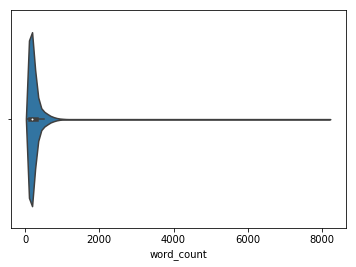

In [173]:
# check distribution of data set
sns.violinplot(x=df["word_count"])
plt.show()

The word count is extremely skewed to the right.
Let's see what the lyrics are for some high word counts.

In [174]:
# display the top songs with more then 8000 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] > 8000])))
df.loc[df['word_count'] > 8000].head()

# of songs with 1 word: 1


,song,year,artist,genre,lyrics,word_count
18869,rap-monument,2014,flatbush-zombies,Hip-Hop,RAPROCK LIT POP NEWS COUNTRY R&B; HISTORY SPOR...,8195


In [175]:
# display the top songs with more then 5000 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] > 5000])))
df.loc[df['word_count'] > 5000].head()

# of songs with 1 word: 3


,song,year,artist,genre,lyrics,word_count
15620,yes-sir-i-will,2007,crass,Rock,"The door stands open - Across lines, invisible...",6232
18869,rap-monument,2014,flatbush-zombies,Hip-Hop,RAPROCK LIT POP NEWS COUNTRY R&B; HISTORY SPOR...,8195
89953,freestyle-june-27,2007,big-moe,Hip-Hop,"(Big Moe) Yeee-yeee haahee yeehaa, yeee-yaahee...",5085


In [176]:
# display the top songs with more then 1000 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] > 1000])))
df.loc[df['word_count'] > 1000].head()

# of songs with 1 word: 572


,song,year,artist,genre,lyrics,word_count
95,get-me-bodied,2006,beyonce-knowles,Pop,"Nine, four, eight, one B day Mission one: I'm-...",1122
113,get-me-bodied-extended-remix-bonus-track,2006,beyonce-knowles,Pop,"Nine, four, eight, one B'day Mission one, Ima ...",1014
1590,tour-hip-hop-version,2006,capleton,Electronic,Yeah I say straighten yuh crooked ways Blessed...,1034
2339,burnt,2007,del-the-funky-homosapien,Hip-Hop,"DEL: Mista, twista, get ya every single time w...",1068
7464,stan,2006,dido,Pop,My tea's gone cold I'm wondering why I Got out...,1238


In [177]:
# check the proportion of songs with less 100 words compared to the entire data set
print("# of songs < 1000 words: {}".format(len(df[df['word_count'] > 1000])))
print("# of total songs: {}".format(len(df)))
print("% of songs < 1000 words: {}%".format(len(df[df['word_count'] > 1000])/len(df)*100))

# of songs < 1000 words: 572
# of total songs: 227180
% of songs < 1000 words: 0.2517827273527599%


Since there are only 0.25% of songs with 1000 words, let's eliminate them to simplify data set.

In [178]:
# delete songs with more than 1000 worda
df = df[df['word_count'] < 1000]
# review data
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14203.0,188.170598,80.667305,51.0,130.0,172.0,231.0,895.0
Electronic,6989.0,217.124052,127.434446,51.0,126.0,190.0,273.0,990.0
Folk,2016.0,198.216766,98.313421,51.0,129.0,179.0,247.0,998.0
Hip-Hop,23735.0,489.282831,197.858712,51.0,350.0,487.0,623.0,999.0
Indie,3027.0,202.890320,100.437058,52.0,133.0,186.0,251.0,952.0
Jazz,7674.0,177.927287,93.729772,51.0,112.0,156.0,218.0,935.0
Metal,21590.0,183.510607,102.359617,51.0,114.0,161.0,225.0,999.0
Pop,39595.0,249.839576,123.408581,51.0,161.0,227.0,313.0,999.0
R&B,3348.0,227.329450,115.151365,52.0,144.0,205.0,282.0,892.0


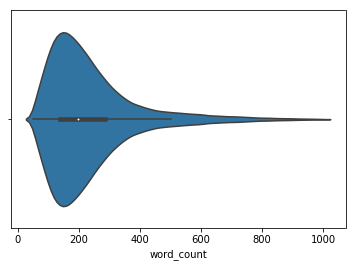

In [179]:
# check distribution of data set
sns.violinplot(x=df["word_count"])
plt.show()

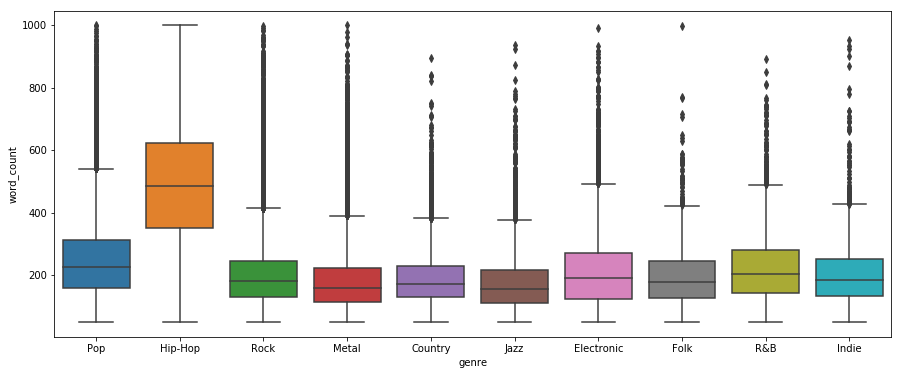

In [180]:
plt.rc("figure", figsize=(15, 6))
sns.boxplot(x="genre", y="word_count", data=df)
plt.show()

In [181]:
# display panda info
df.info()
# check shape of data frame
print("# of rows: {}\n".format(df.shape[0]))
print("# of columns: {}\n".format(df.shape[1]))
# check how data is organized
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226602 entries, 0 to 362236
Data columns (total 6 columns):
song          226602 non-null object
year          226602 non-null int64
artist        226602 non-null object
genre         226602 non-null object
lyrics        226602 non-null object
word_count    226602 non-null int64
dtypes: int64(2), object(4)
memory usage: 22.1+ MB
# of rows: 226602

# of columns: 6



,song,year,artist,genre,lyrics,word_count
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312


In [182]:
genre = df.groupby(['genre']).count()
genre

,song,year,artist,lyrics,word_count
genre,,,,,
Country,14203,14203,14203,14203,14203
Electronic,6989,6989,6989,6989,6989
Folk,2016,2016,2016,2016,2016
Hip-Hop,23735,23735,23735,23735,23735
Indie,3027,3027,3027,3027,3027
Jazz,7674,7674,7674,7674,7674
Metal,21590,21590,21590,21590,21590
Pop,39595,39595,39595,39595,39595
R&B,3348,3348,3348,3348,3348


In [183]:
artist = df.groupby(['artist']).count()
artist

,song,year,genre,lyrics,word_count
artist,,,,,
009-sound-system,4,4,4,4,4
047,1,1,1,1,1
1-800-zombie,2,2,2,2,2
10-cc,142,142,142,142,142
10-years,74,74,74,74,74
100-demons,1,1,1,1,1
100-monkeys,30,30,30,30,30
10000-maniacs,90,90,90,90,90
1000mods,10,10,10,10,10


In [184]:
from sklearn.model_selection import train_test_split
# shuffle and split dataset into training dataset and testing dataset
train, test = train_test_split(df, test_size=0.2)

In [185]:
# check shape of train panda
print("# of rows: {}\n".format(train.shape[0]))
print("# of columns: {}\n".format(train.shape[1]))
# check how train data is organized
train.head()

# of rows: 181281

# of columns: 6



,song,year,artist,genre,lyrics,word_count
279337,baby-it-s-you,2006,elvis-costello,Rock,"(Sha, la, la, la...) It's not the way you look...",134
179872,shelter,2007,extol,Metal,I close my eyes It's not the picture of You I ...,97
260246,somewhere,2006,charlotte-church,Pop,There's a place for us Somewhere a place for u...,89
27959,the-enemy,2006,big-l,Hip-Hop,I drive up and down Harlem blocks Iced out wat...,482
245457,all-in,2014,fox-stevenson,Electronic,"You know I'm not gonna tell you, something you...",279


In [186]:
# check shape of test panda
print("# of rows: {}\n".format(test.shape[0]))
print("# of columns: {}\n".format(test.shape[1]))
# check how test data is organized
test.head()

# of rows: 45321

# of columns: 6



,song,year,artist,genre,lyrics,word_count
219837,sickness,2005,full-scale,Rock,It's coming down the mainline Coming on like p...,250
215256,orphan-anthem-86,2004,fair-to-midland,Rock,We're gone but not better. A lighted match can...,136
319884,four-years-older-than-me,2006,dr-hook,Rock,I was seventeen years old that day I was tryin...,267
70294,how-will-i-know,2007,dannii-minogue,Pop,"There's a boy I know, he's the one I dream of ...",454
226733,losing-my-mind,2012,firewind,Metal,Happiness dying slowly - Take life for what it...,195


# Tuning Hyperparameters

Goal: Create a multiclassifer able to classify 10 genres of music based off lyrics using SVM.
We first vectorized our lyrics ussing tfidf, or Term Frequency Inverse Document Frequency in order to create a vector space for each of our sogs. We created two vectorizers one with top 100 features and one with 5000

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer
# max_features = 50
vectorizer = TfidfVectorizer(max_features=100)
x_train = vectorizer.fit_transform(train['clean_lyrics'])
x_test = vectorizer.transform(test['clean_lyrics'])

In [319]:
# max_features = 50
vectorizer_2 = TfidfVectorizer(max_features=5000)
x_train_large = vectorizer_2.fit_transform(train['clean_lyrics'])
x_test_large = vectorizer_2.transform(test['clean_lyrics'])

In [201]:
pop_label = []
for i in train['genre']:
    if i == 'Pop':
        pop_label.append(1)
    else:
        pop_label.append(0)

When building our model we first begin by tuning our hyperparameters. We first adjust the penalty parameter and plot the resulting accuracies. As you can see it does't improve our accuracy by much with a max of 53% using a feature size of 100

In [198]:
from sklearn.svm import LinearSVC
Cs = [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
svms = [LinearSVC(verbose=1, C=c, multi_class='ovr') for c in Cs]
svms = [svm.fit(x_train, train['genre']) for svm in svms]
#svm.fit(x_train, train['genre'])

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

[0.51881026455726931, 0.53087972463096578, 0.53185057699521199, 0.5319609011275126, 0.53193883630105254, 0.53220361421857421, 0.24198495178835419]


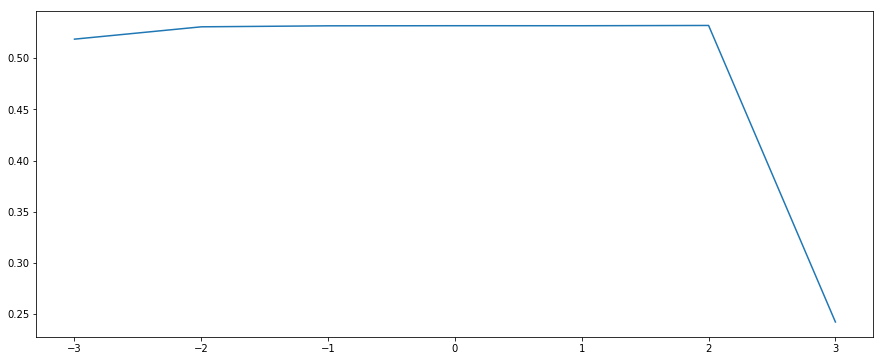

In [199]:
test_scores = [svm.score(x_test,test['genre']) for svm in svms]
print(test_scores)
plt.plot(np.log10(Cs), test_scores)
plt.show()

[0.52009311510858836, 0.53223448679122465, 0.53228413347234405, 0.53231171496185481, 0.53235032904716983, 0.53137946061639107, 0.240830533812148]


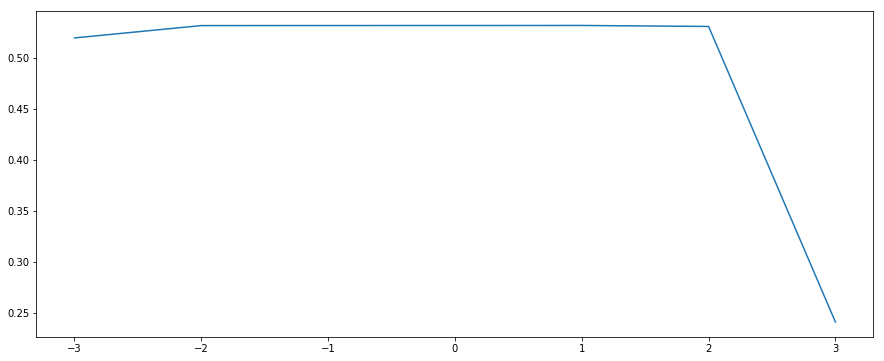

In [200]:
train_scores = [svm.score(x_train, train['genre']) for svm in svms]
print(train_scores)
plt.plot(np.log10(Cs), train_scores)
plt.show()

In [231]:
cnt = 0.
avg, std = np.mean(fn_cons), np.std(fn_cons)
for c in fn_cons:
    if c >= avg:
        cnt += 1
print('%.2f%%' % (cnt / len(fn_cons) * 100))

56.97%


-0.227177978132 0.170568010778


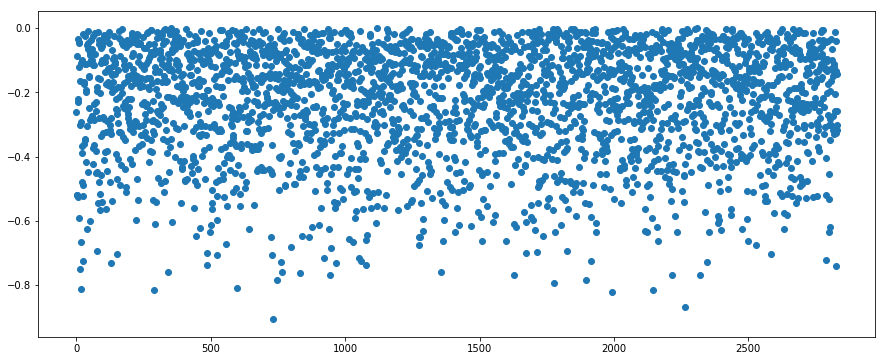

In [223]:
print(np.mean(fn_cons), np.std(fn_cons))
plt.scatter(range(len(fn_cons)), fn_cons)
plt.show()

Next we check the distribution of our False Negatives and False positives and choose to adjust the class weight to balanced. This uses the values of y to automatcally adjuest weights inversly proportional to class frequencies

In [230]:
cnt = 0.
avg, std = np.mean(fp_cons), np.std(fp_cons)
for c in fp_cons:
    if c <= avg:
        cnt += 1
print('%.2f%%' % (cnt / len(fp_cons) * 100))

57.94%


0.235264305086 0.182357417295


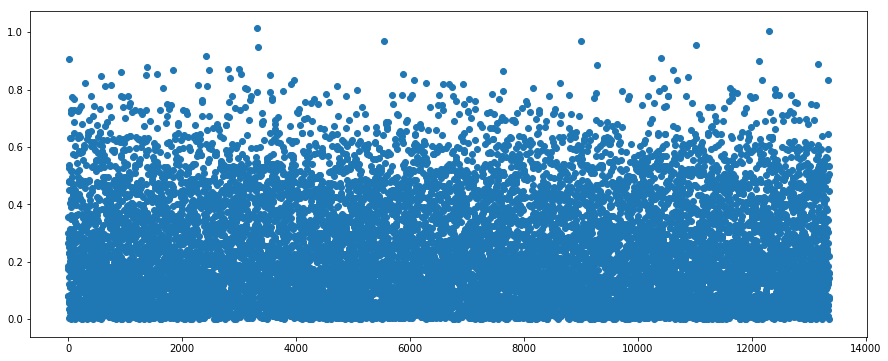

In [224]:
print(np.mean(fp_cons), np.std(fp_cons))
plt.scatter(range(len(fp_cons)), fp_cons)
plt.show()

0.30630756272 0.200702756806


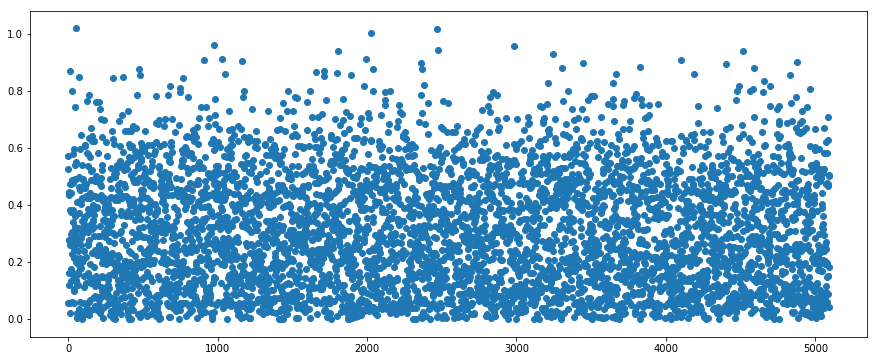

In [225]:
print(np.mean(tp_cons), np.std(tp_cons))
plt.scatter(range(len(tp_cons)), tp_cons)
plt.show()

In [217]:
print(len(pop_label))
for (pred, truth) in zip(svm_pop.decision_function(x_test), pop_test):
    print(pred, truth)

181281
-0.262501752336 1
-0.481837203469 0
0.572836805694 1
-0.520064835843 1
0.0581181897032 1
-0.285171275982 0
-0.518856733841 1
0.0809486261497 0
0.300801236 0
0.18453967916 0
0.525045334502 1
-0.192500140864 0
0.355102471777 0
-0.180276354287 0
0.175258553719 0
-0.181269606456 0
-0.258353819773 0
0.160811205103 1
-0.412415381603 0
-0.597370823146 0
-0.18914170878 0
0.266295564669 0
-0.000382606291935 0
0.0828378665148 0
-0.62468467246 0
0.447364317334 1
0.284353246507 0
-0.318739455084 0
-0.0266238366872 0
-0.534472908825 0
0.231756313442 0
-0.0910251972063 0
-0.389218132781 0
-0.0854447733812 1
-0.459110354 0
-0.817152624945 0
-0.527335922887 1
-0.145245080061 0
-0.305658788541 0
0.537553924212 0
-0.42596776603 0
0.478898470177 0
0.0372178769663 0
-0.480845756339 0
-0.154989339095 0
0.436945097452 1
0.120032426881 1
-0.117873309492 0
0.27668181648 1
-0.159992947621 0
-0.0538864035062 0
0.276571824096 1
0.0581181897032 1
-0.52993304846 0
-0.608120532776 0
0.253332914549 0
0.907829

-0.603001666712 0
-0.286197380744 0
-0.47582317505 0
-0.154804411158 0
-0.222911062878 0
-0.643627686692 0
-0.020492276474 0
-0.933981840393 0
0.0946769434005 0
-0.274505760766 1
0.21608665466 0
-0.473185911736 0
-0.159643659352 0
-0.326378922817 0
0.1271869847 0
-0.117532173109 0
0.465826648293 1
0.230414232866 0
-0.566315168779 0
-0.162896325396 0
0.208912565524 1
-0.165525489896 0
-0.385118487777 0
-0.372149905211 1
0.303996630944 1
-0.25621130546 0
-0.185632574899 0
-0.943248420569 0
-0.113154931094 1
-0.456468045272 0
0.0158977177202 0
-0.0235475256696 1
0.226149545401 0
-0.920475724019 0
0.112527546012 1
0.151052774647 0
0.358030182793 1
-0.104752315235 0
0.555456920709 0
-0.507945403754 0
-0.0204322907503 0
0.335522644009 1
-0.333411895987 0
0.0488978104967 0
-0.0527650105932 0
0.186583951934 0
0.331729895319 1
-0.0946393043207 0
-0.143856238169 0
-0.527122469253 0
0.0299637582755 0
-0.423622629763 1
-0.43285601212 0
-0.798337233472 0
0.237964311764 0
0.270386274053 0
0.27154543

-0.0576910855542 0
0.655807331882 0
0.642461220167 1
-0.369539790555 0
-0.100179401589 0
-0.00686212617456 0
0.231317670464 1
-0.641449789407 0
-0.539488913162 0
0.625161974145 1
0.777709554923 0
-0.328259403504 0
-0.289009870384 0
-0.327874872815 0
0.52344126002 1
-0.42776530645 0
-0.157257249108 0
-0.0398801654778 0
-0.577053541853 0
0.616185865101 0
-0.0554349594496 1
0.00365649690632 0
-0.0992606101481 0
0.178652289982 0
-0.0614295368748 0
0.0860384461686 0
0.379459967983 1
0.603029962304 0
-0.249388424533 0
-0.28642190884 0
-0.097156539793 1
-0.520029825566 0
-0.0748487214102 0
0.0779578625809 0
0.242637392883 0
0.316706008553 1
-0.868891289785 0
-0.130690740655 0
0.266622566919 0
0.0807550285569 0
-0.0555368423511 0
0.083883997055 0
0.456630284084 0
0.14215475235 1
-0.329629270117 0
-0.0316728761492 0
0.342401259734 0
0.139533474427 1
-0.31905664824 0
-0.000436977074591 0
-0.173476957595 0
-0.0978923087999 1
-0.298206641982 0
-0.0581029133229 0
-0.387697966755 0
0.0285690356927 0

-0.216321323989 0
-0.353490043708 0
0.0779526949826 1
0.0662142646032 0
0.159343160979 0
-0.0795679873081 0
0.0117433173918 0
-0.183828537047 0
-0.518745294802 0
-0.134861563669 0
-0.174711602387 0
-0.253062165735 0
-0.199291031622 1
0.0920295928083 1
0.549515837089 0
-0.27833634864 0
-0.583375445705 0
0.0523306298272 0
0.127075331488 0
0.107146318318 0
0.478011938341 0
0.567977967895 0
0.573552386624 1
0.0507794764126 1
0.286504878333 0
-0.210525698537 0
0.461582490729 0
-0.360214051617 0
-0.537589120628 1
0.328096836759 0
0.624193516582 0
0.3031369916 1
-0.169700352626 0
0.493893691618 0
0.252522057626 0
-0.167688497292 0
0.154154598152 0
-0.190669795254 0
-0.206422487714 0
0.253550217507 0
0.53138915858 0
-0.309843898522 0
0.118894616634 1
-0.115686882955 0
-0.322615705392 0
0.161340520317 0
-0.622218885931 0
-0.520690519117 0
-0.0450535697802 0
0.143890894799 0
0.283928240491 0
0.173140911316 0
0.104236785662 0
0.0919072304945 0
-0.117220135401 1
0.0653870698363 0
0.153935081262 0


0.0843753018882 0
-0.183264260841 0
0.0188705315202 1
-0.466648365937 0
-0.0354183537534 1
0.185516241423 1
-0.0788703676578 0
-0.430878830296 0
-0.0765844472163 0
-0.233041614417 0
0.063166630639 0
-0.185415497007 0
-0.376359237708 0
0.235645519564 0
0.365598533548 1
-0.261423333414 0
0.281749910552 0
-0.303711085026 0
-0.266483691093 0
-0.275732629153 0
-0.665699497932 0
-0.26623864033 0
-0.174290776037 0
0.309080503795 1
0.217051335294 0
0.233633000436 0
-0.163195015119 1
-0.171266371482 0
-0.230971264261 0
-0.268180608258 0
0.339498326948 0
0.0483706311311 0
-0.164674293247 0
-0.254272972626 1
0.188813823664 0
0.0486256901051 0
-0.41271718257 0
-0.379425578362 0
-0.450015889093 0
0.351699085081 0
0.332060280128 0
-0.357168848548 0
0.378607111457 1
-0.184044302413 0
-0.156025925345 0
0.0750049699142 1
-0.531412504924 0
0.0436635240855 1
-0.361818815372 0
-0.387543479951 0
0.083488745885 0
-0.599413549288 0
-0.206150891267 0
-0.436829601655 0
-0.655341425633 0
-0.0229857731208 0
-0.2

-0.12193107813 0
-0.0868448953636 0
0.640095606564 0
0.232905704766 1
-0.26316495235 0
-0.104371984391 1
0.135496819375 0
0.232955220806 0
-0.0201469644352 1
-0.00217811971252 0
0.638863956034 0
0.108797086753 1
-0.0695448717781 0
-0.263948235845 0
0.0709921550266 0
-0.400840699712 0
-0.140908606757 0
0.274430409554 1
-0.219561417472 0
-0.0993767882145 0
0.13979318732 1
-0.560658867909 0
-0.222377393348 0
-0.177672290656 0
0.101889966161 0
0.753958891048 0
-0.00254006647405 0
0.170319320521 0
0.152783652441 0
-0.654638439956 0
0.286922167355 0
-0.405236893619 0
0.329788839244 0
0.406617207233 0
-0.558607964734 0
-0.333814056927 0
-0.608827433544 0
-0.483841682992 0
-0.480254331885 0
-0.192935790111 0
-0.292052196513 0
-0.447828266609 0
-0.534435686587 1
-0.704785220939 0
0.119564134797 0
-0.195068429893 0
-0.782380531979 0
0.248060785206 0
-0.832983706771 0
-0.304203249756 1
0.187873572474 0
0.129655496949 0
0.306719452468 1
-0.504793649528 0
0.377918229824 0
0.299956550544 0
0.0573525

0.0312893910987 0
-0.412359682172 0
0.368706283346 0
-0.345155764905 0
0.270434160366 0
0.553684419509 1
0.192207226743 0
0.0682757186484 0
-0.285256625942 1
0.370703742842 0
0.181812685661 1
0.231022539013 0
0.131516245478 0
0.337559887823 0
-0.407453641138 0
-0.330052203035 0
-0.281762694163 0
0.600470528956 0
0.0751155582499 0
0.21589378746 0
-0.766632020653 0
-0.221443473956 0
-0.0621876263504 1
-0.0130203861849 1
-0.16682660758 0
-0.155108711625 1
-0.0128736202454 0
-0.409138052284 0
0.0257304731765 0
-0.0485399676134 0
0.138261168457 0
-0.466447183701 0
-0.135085173888 0
0.0230514308978 1
0.0507532664151 0
-0.0122572568304 0
-0.390683033382 0
-0.234564652147 1
0.181143226364 0
-0.35925038618 0
-0.0223960664795 0
-0.277913645522 0
-0.290681245988 0
0.121339297812 0
-0.342102356865 1
-0.594160012784 0
0.0813292344663 0
-0.134136502064 0
-0.486134736066 0
0.0753892495009 0
-0.180591785498 0
-0.766480707399 0
-0.0532617569501 0
-0.126061204867 0
-0.290662041304 0
0.0628935962921 0
-0

0.553805028046 1
0.0489583289964 1
0.537772127751 1
0.0699616343579 0
-0.300299446656 0
0.313691085339 1
-0.209466834374 0
-0.294862398076 0
0.53225578812 0
0.0260692592839 0
0.00554219259129 0
0.425444121596 0
-0.0100821296821 1
0.0963148876735 0
0.251848224997 0
0.409617500086 0
-0.62348573848 0
-0.678422998222 0
-0.777927262947 0
0.134900166852 1
0.244908674297 0
-0.698849655582 0
-0.653400963136 0
0.112181747232 0
0.48979758859 0
-0.304041989066 0
-0.232148788879 0
-0.0312142972475 1
-0.240840442418 0
0.478218006185 0
-0.28861049262 0
-0.0208731295706 0
-0.16383598714 1
0.610894315961 1
0.203587369893 0
0.210985957215 0
-0.699089798315 0
-0.295883526293 0
-0.533595237411 0
-0.499403944309 0
0.32269632943 0
-0.567353220113 0
-0.258293056062 1
-0.0918251872398 0
0.113594944919 0
0.424500795952 0
-0.350643569248 0
-0.234519327525 0
-0.607643694589 0
-0.163658736877 0
-0.578123323357 0
-0.257310017573 0
-0.0696939990605 0
0.0189738626696 0
-0.0397544328402 0
-0.702360349126 0
0.1088367

-0.108204091892 0
0.233040770468 0
0.438578392044 1
0.583949507527 0
0.200398501328 1
-0.0763779899527 0
-0.191414822412 0
-0.288141669099 0
-0.217056610717 0
0.322205204842 1
0.418369392982 0
-0.276642702678 0
0.306315856622 1
0.0581181897032 0
0.492700773169 1
-0.336849561616 0
0.0601605633559 0
0.439605391375 1
-0.615263267792 0
-0.211694236298 0
0.00125872454797 0
0.118658690325 0
-0.57572172738 0
-0.12936705707 1
-0.367115240691 0
0.110217504461 0
-0.0953412156862 1
-0.0928362263309 0
0.0636067955779 0
-0.66319101444 0
-0.58000506558 0
0.0735591383314 0
-0.357460953023 0
-0.229212879354 0
-0.320067323126 0
-0.558381896875 0
0.452362621083 1
0.106955353886 1
0.438962840828 0
-0.742427912314 0
-0.370206684653 1
0.247581028328 0
-0.744345298159 0
-0.335321179758 0
0.136693769527 0
-0.377487707731 0
0.461621713972 0
0.0520277876084 0
-0.694462233018 0
0.475686208311 1
0.000138819302767 0
-0.02959390471 0
-0.369133059516 0
-0.102811961399 0
-0.0963591359196 0
-0.409198058397 0
0.166526

-0.377074254718 0
-0.337173313907 0
-0.360771068943 1
0.0423750713653 0
-0.216760659225 0
-0.149947340343 1
0.202547658828 0
-0.36514873657 0
-0.631248677604 0
-0.548399916411 0
0.233428336203 0
0.353502202685 0
0.325262023758 0
-0.0887377447301 0
-0.215157669828 1
-0.102281619427 0
0.174698177323 0
-0.119248050555 0
0.0625498871249 0
-0.545342427213 1
-0.656597301566 0
-0.0310726478465 0
-0.483084122012 0
-0.434127676715 1
-0.558370653945 0
-0.211910636382 0
0.188206313443 0
0.230866924447 0
0.209541416479 0
0.496998300726 0
0.52144628371 0
-0.401572087872 0
-0.84520419572 0
-0.198492727099 0
0.160457152774 0
-0.119337298682 0
-0.135006335558 0
-0.438255726886 1
-0.130886845352 0
0.0645052066957 0
-0.373308648786 0
0.00556318264703 0
0.213185518078 0
0.394644732232 0
0.702130431785 1
-0.0259916837266 0
-0.17020207109 1
0.462200106743 0
-0.395621860659 0
0.250759250624 0
-0.201946020437 0
-0.0070015662483 0
-0.24461723274 0
-0.312930061985 0
0.0445390381242 0
-0.274826820821 0
-0.73214

0.0578630451232 1
0.276959874259 1
-0.230415677981 0
-0.291590601267 0
0.163190892022 0
0.108919936151 1
-0.00590829683958 0
-0.355272931564 0
0.204189511505 0
0.385760479847 1
-0.205308083705 0
-0.600981519982 0
-0.109533242107 0
-0.121666109809 0
-0.243474956882 0
-0.0334538672833 0
-0.585075455814 0
0.170119954052 1
0.603061963054 1
-0.416275368699 0
0.0562595207186 0
0.0990151430318 0
0.00438090457204 0
-0.228926829531 0
0.00345249636955 0
-0.184384051513 0
0.0300223239463 0
-0.0511155315689 0
-0.242973069251 0
-0.299702169693 0
-0.174891717758 0
-0.0334344449789 1
0.230536484393 0
-0.471694826378 0
-0.639048985482 0
0.0284059896415 0
-0.044075801915 1
0.723897018579 0
0.506787500703 0
-0.41611112904 0
-0.0971269624764 0
-0.671059479044 0
-0.489305886821 1
0.322374402902 0
-0.660330066767 0
0.123852757494 0
0.162191239025 1
0.396872089605 1
0.226578355738 0
0.271234612188 0
0.0465003165846 0
-0.00399533646517 0
-0.136678607071 0
-0.349945341459 0
-0.548648484377 0
-0.0839197030673 

0.0938217786819 0
0.173518425328 0
-0.238924910673 1
0.221339655994 0
-0.431638521999 0
-0.470890540169 0
-0.612400191131 1
0.00112908726934 0
0.23099048558 0
0.0585029507254 0
-0.0939093937089 0
-0.00104339628705 0
-0.293171551081 0
-0.23592200701 0
0.034285816634 0
0.0288637773856 0
0.172578679606 1
-0.289629152406 0
0.0200994571882 0
0.587698386269 0
0.103340302356 0
-0.284929030237 0
0.102470761443 0
0.0581106785108 0
-0.0769742874844 1
-0.331257751572 0
0.0653727323615 0
-0.0663561108573 0
0.0897736650634 0
-0.15000683022 0
0.298240628303 1
-0.405598458796 0
0.164334349738 0
-0.483909993092 0
0.0812173396277 0
-0.111216158167 0
0.176287628067 0
-0.11758714172 1
-0.0731975807016 0
0.537892862271 1
0.165623175777 1
-0.203649767294 0
0.0606878347454 0
-0.263454698312 0
-0.304308272743 0
-0.648118431581 0
-0.306552563158 0
-0.641288616694 0
-0.212932849592 0
-0.471476501941 0
-0.383100630166 0
0.00513167353268 1
-0.218670025955 1
-0.611167529076 0
-0.516252738003 0
-0.0223504793385 0


0.0856347518155 1
0.192472133363 0
0.303483303185 0
-0.15047878884 0
0.498793688427 1
0.0426555327919 0
-0.275953272854 1
-0.172806288482 0
-0.0303222077745 0
0.377219291677 1
-0.333791868808 0
0.266384153221 1
-0.039695170438 0
0.0323057229682 0
-0.329982514176 0
-0.0542858128249 0
-0.00214110411191 0
-0.395991041104 0
-0.0944375778931 0
0.1623644145 0
-0.0379338042901 0
0.444457342733 0
-0.214493862644 0
0.255948656745 0
-0.33686679527 0
-0.437157565574 0
-0.167084102776 0
-0.108814208983 0
0.107961875046 0
0.401726413218 0
-0.584667083704 0
0.14954895287 0
0.612872635763 0
0.203349877191 0
-0.32880277279 0
0.201752280982 0
0.0891315736824 1
0.198014222488 0
0.189489181139 0
-0.124907980436 0
0.193363406111 0
0.0825014458172 0
0.197746234572 0
-0.409455422343 0
0.17638334514 1
0.0944385229849 0
-0.368841994817 1
-0.0311975819571 0
-0.330692943958 0
-0.0507091031604 1
0.30497225201 0
-0.239688591281 0
0.424500795952 0
0.0503381865058 0
0.665299582302 0
-0.555523552886 0
0.019639118532

-0.0423294619376 0
-0.282265164455 0
0.126349910443 1
-0.589198107457 0
0.186685071566 0
-0.125052355728 0
0.533405117137 0
-0.212421499702 0
-0.245914914482 0
0.395089849544 1
0.233358223832 1
0.522613481911 0
0.911027884427 1
-0.73394412795 0
-0.506878870011 0
-0.0654056564298 0
-0.471912978605 0
-0.0612106936339 0
0.0800002894917 0
-0.258850238191 0
0.273873588347 0
-0.285271636829 0
-0.424892271614 1
-0.262660354886 1
-0.21838222695 0
0.00262338904191 0
0.0716703187531 0
-0.265649563297 0
0.186215891094 0
-0.411507393852 0
-0.715574457078 0
0.382365616611 1
-0.731083710821 0
0.254600830424 0
-0.0811222992328 0
-0.123175836599 0
-0.377740912487 0
-0.713658465203 0
-0.348379407777 0
-0.604832697385 0
0.0581181897032 0
-0.340182081366 0
-0.174221990881 0
0.460191122982 0
-0.165635306618 0
-0.564323346785 0
-0.0645634051151 0
-0.156838886454 1
0.15348122055 0
0.19968683052 0
0.353688185399 1
0.139995280789 0
-0.532506374299 0
-0.12264478947 0
-0.205339850334 0
0.6780703183 0
0.17626412

0.395875946498 0
-0.510727624332 0
-0.273533449466 1
-0.346003629885 0
0.509680246568 0
-0.103578115907 0
-0.11358041924 1
0.608388724478 0
-0.111128091666 0
-0.0102179515627 0
0.143155280419 0
-0.273527614355 0
0.0219592004245 0
0.224841714232 0
-0.139052365236 1
-0.308975962051 0
-0.562121514621 0
-0.35962371611 0
-0.327790991021 0
0.445144877813 0
-0.584230679996 0
0.153934598931 0
-0.332892998219 0
0.0914824620336 0
0.164450505548 0
0.109665635717 1
-0.606160819822 0
-0.0478249892907 1
-0.0443698772053 0
-0.387467823612 0
-0.470364414614 0
0.503366658676 1
-0.533314740492 0
-0.109298618418 0
-0.0759688253611 0
-0.12956906298 0
-0.216894599111 0
-0.364696817281 0
0.269983806381 0
-0.185391602857 0
-0.476084145977 0
-0.0905533255077 0
0.051588555891 0
-0.323804873076 0
0.350347454153 1
0.0217417275897 0
-0.298355981845 0
0.0949102050341 0
0.0496962800893 1
-0.139408734808 0
0.0317777884281 0
-0.288263119784 1
-0.625612965187 1
-0.0730015886472 0
-0.0197293360385 0
0.274460455866 0
-0

-0.464490259144 0
0.115705227026 0
0.00438361003379 0
-0.433507033289 0
-0.947491104136 0
0.6205235562 1
0.0692572853095 0
-0.156502986913 0
-0.392034171886 0
-0.390332083147 0
-0.159041343602 0
0.0985956011486 0
-0.298874151459 0
0.319160089123 1
-0.112945956158 0
0.153936478113 1
-0.327161760321 1
-0.297410294285 0
-0.43145778336 1
-0.687873517408 0
-0.0380381939068 0
-0.257230875514 0
-0.284184845436 0
-0.321779377928 0
-0.132353084736 0
-0.331362702738 0
0.352996930852 0
0.477168811788 0
0.316854534269 1
-0.0696759700569 0
-0.0509591742129 0
-0.148538357147 0
-0.133925199156 0
0.424500795952 1
0.201851919168 0
-0.22913920924 0
0.128734639829 1
-0.206234093586 0
-0.52038588513 0
0.0990846090595 0
-0.285734444316 0
-0.0660719497126 0
0.318825323959 0
-0.589300019788 0
0.0525316137974 0
-0.214658295338 0
0.0581181897032 0
-0.0240858786822 0
0.373705068422 1
0.255049427991 0
0.0166721416985 0
-0.253646775408 0
-0.00820100155069 0
-0.381952683586 0
0.0504084746289 0
0.546572885647 1
0.1

-0.398496249652 0
-0.336828887989 0
0.349401784065 0
-0.618834909592 0
0.202285104988 0
0.291469101486 1
-0.208023126615 0
-0.165909210368 0
0.105655008596 0
-0.126579218506 0
0.128808218914 0
-0.0362718510276 0
0.305920624855 0
0.529936277807 0
-0.087489506398 1
-0.143047764789 1
0.0138937919655 0
-0.155279183406 1
-0.230519491841 1
0.139326129885 1
0.601360457481 0
0.368072609085 0
-0.678264095758 0
0.074623694648 1
0.046993986222 1
-0.0440743645928 0
-0.167573962694 0
-0.692702571712 0
0.0083735931117 0
-0.31395339498 0
-0.308141926008 0
0.50036387544 0
0.313094245658 0
-0.00527172832997 0
-0.317932791627 0
0.0523797501748 0
-0.646752670467 0
-0.0718546071039 0
0.460291158991 0
0.513230436402 0
-0.227989846335 0
-0.550499279453 0
0.404068003735 0
-0.808463241308 0
0.519909541456 0
-0.540783552303 0
0.238531322319 0
0.0581181897032 0
-0.23642407054 0
-0.0181523352582 0
0.138696240023 1
-0.587382630373 0
0.0164046054683 0
0.191292707395 0
-0.187349592512 1
0.0621754031337 0
0.29839919

-0.069893304507 0
-0.496697968048 0
-0.149418522953 0
-0.462958491161 0
0.66271607209 1
-0.0729701987722 1
-0.229829590913 0
-0.255864629003 0
-0.392138619022 0
-0.150574433669 0
0.273454102989 0
0.0372076826162 0
-0.389074100575 0
0.476060319768 0
0.224259425835 0
0.497269148175 0
-0.249350875202 0
-0.490125440373 1
-0.0417047562795 0
-0.313465505229 0
0.0199443267995 0
0.242957666211 0
0.301165013687 1
-0.425271426341 0
0.119072509293 1
-0.324341658037 0
-0.19903214781 0
-0.49330598799 0
-0.0542874862628 0
-0.275565539227 0
-0.424781357525 0
-0.731280182333 0
-0.432600714735 0
-0.0986798253655 0
-0.663445275569 0
0.0129518990539 0
-0.263468791076 0
-0.491743141019 1
-0.00194457351078 0
-0.481662019608 0
0.193097594613 0
-0.157139989433 0
0.541430851329 0
-0.134442275369 1
0.218211321043 0
-0.566644570541 0
0.410857280079 0
0.250405150998 0
-0.602783623854 0
0.109929472602 0
-0.427570253602 0
-0.415256517323 0
-0.182202003109 0
-0.0684890009399 1
-0.511438263196 0
0.466689402463 1
0.0

0.0404310592902 1
0.313094245658 1
-0.0993327983744 0
-0.438971159446 0
0.145751193895 0
-0.462482081714 0
-0.272734148154 0
0.142719317911 0
-0.150060163411 1
-0.360582491228 1
-0.446171893704 0
-0.328742695754 0
0.587048321098 0
-0.0159685082739 0
0.0546909827824 0
0.123556391885 1
-0.682960902828 0
-0.21063394635 0
0.336102886732 0
0.295764930349 1
-0.108280441383 0
0.245950055673 0
-0.243860317758 0
-0.484028475664 0
0.39569464041 1
-0.147399449965 0
-0.125512590496 0
-0.47918418578 0
-0.156769071995 1
0.184012447935 0
0.229185088118 0
-0.490944007125 0
0.564467600597 0
-0.0212580162468 0
-0.0424199269008 0
-0.512792819797 0
-0.0314708776609 1
0.0740474843244 1
-0.156279896733 0
0.504503654895 1
0.00176934771193 0
0.507870199523 0
-0.398723816045 0
-0.295621902585 0
-0.301976498184 0
-0.612089057996 0
0.00475254529694 0
-0.130102679388 0
-0.318161513803 0
-0.149703712648 0
0.279935234264 0
-0.650843948634 0
-0.438507670889 0
0.394896950484 1
-0.457491335495 0
0.202577347921 0
0.137

-0.588806190902 0
0.445902944535 1
-0.384540693941 0
-0.636802999702 0
-0.0863985079298 0
-0.0737103110663 0
-0.460215246658 0
0.0420241317256 0
0.336044988156 1
-0.056785192058 0
0.118938086579 1
-0.571161489184 0
-0.0434400253843 1
-0.603441534108 0
-0.166328741751 1
-0.540665895256 0
-0.368163312145 0
0.432118696922 0
0.185058784291 0
-0.699409563442 0
-0.37263558407 0
0.0155889830089 0
-0.428436173064 0
0.148960362894 0
0.59860807018 1
-0.410181871307 0
-0.641654012662 0
0.104000017509 0
-0.785161518594 0
-0.358779428518 0
-0.190024891434 0
-0.500142224565 0
-0.300383707016 0
0.27914766344 0
-0.822510921244 0
-0.405179616161 0
-0.534926747792 0
-0.34511131305 0
-0.583066075958 0
0.166622803389 0
-0.625955355913 0
-0.278835725595 0
-0.533050639195 0
-0.0506213798388 0
0.0441093587613 0
0.0505134606603 0
-0.166576782009 0
0.1181641872 0
-0.76223740876 0
0.619940124519 0
-0.0668868136022 0
-0.312275680831 0
-0.243875913957 0
0.466423356029 1
-0.162605335108 0
0.243340767123 1
0.513217

0.566854453992 0
-0.475898373865 0
0.389300293299 1
0.147387164402 0
-0.599941673531 0
0.336559250139 1
-0.671350663154 0
-0.321199416566 0
-0.0964675810303 0
-0.152612324589 0
-0.0168432545079 1
0.602297031755 0
-0.266736911598 0
0.114139478609 1
0.18273856526 0
-0.704812880444 0
0.335688242995 0
0.709508067399 1
0.21595915367 1
-0.189814287746 0
0.285965622502 1
0.216960661329 0
-0.547175621457 0
-0.317915970639 0
-0.386605438009 0
-0.534460681089 0
0.013053958988 0
-0.132071245628 1
-0.106965741626 0
-0.186408807214 1
-0.432150985309 0
-0.130394525493 1
0.0835389598698 0
-0.108182590018 0
-0.455347405206 1
0.131351743737 0
-0.748365354773 0
-0.321596366639 0
0.476060319768 0
-0.160078222005 0
-0.361546402705 0
-0.557086846318 0
-0.242038742581 0
0.470043248787 0
-0.614224543309 1
-0.166274939457 0
-0.00212718709817 0
-0.125921158573 0
-0.429938578633 0
-0.158081772055 0
-0.441400745418 0
-0.0415740016097 0
0.226390404302 1
-0.381417386081 0
-0.218018655067 0
-0.254439416338 0
0.0721

0.220904889837 1
0.175450610282 0
0.554999106571 1
-0.303166444599 0
0.0989895618289 0
0.642397244773 1
0.0929036345158 0
-0.205680762777 0
-0.155857248757 0
-0.404559527316 0
0.57185017201 0
0.00574389071188 0
-0.497076571356 0
-0.811434718962 0
0.210978331541 1
-0.437520294928 0
0.211049544238 0
-0.349138725638 0
0.123216976865 0
-0.293365694068 0
-0.619028778295 0
-0.0818112429936 0
-0.542400653724 0
0.546447234185 1
-0.377115165578 0
0.129181553908 0
0.340389886778 1
0.0911163817711 0
0.254693610355 0
0.402463804736 0
0.328267540959 0
0.399546408262 0
-0.296124387642 0
0.243477088093 0
-0.393144559908 0
0.199529277781 0
-0.385827983675 0
0.224538109396 0
0.155791952766 0
0.225229181924 0
0.66339999244 0
-0.267519036319 0
-0.0281699320643 0
0.319865849572 1
0.233612362855 0
-0.71420304405 0
-0.0602346386661 0
-0.410724378954 0
-0.3740382075 0
0.301015696832 0
0.0251952373384 0
-0.524121899906 0
-0.299237771092 0
-0.367030891155 0
-0.0465655349917 0
-0.342831361032 0
0.0958615677351 

0.651547394739 1
-0.14388479423 0
0.811911500438 0
0.121355480729 1
-0.367281188497 0
-0.0642364970815 1
-0.453677916209 0
-0.0506772754242 0
0.645661272015 0
-0.1040857808 0
0.596901254568 1
-0.390379824878 0
0.227327205022 0
-0.533171693192 1
-0.0485018756469 0
-0.109829210332 0
0.136709189335 0
0.602702035578 0
0.0447485814973 0
0.157310984233 0
0.311372626891 1
-0.572923095703 0
0.299121449748 0
-0.324839212903 0
0.389735808052 0
0.0429642819716 0
0.00962680962892 0
-0.684927972245 0
-0.0565886598944 0
-0.381795091377 0
0.489011589374 1
-0.159912547619 0
0.00386390090122 0
-0.252635605584 1
0.25138698902 0
0.235294096463 1
-0.361296773509 0
-0.146965351003 0
-0.11478123301 0
-0.50504927006 0
-0.0282035570608 0
-0.234424344051 1
-0.616072555208 0
0.201381908068 0
-0.084776226901 0
-0.254943755978 0
0.0852085423762 1
-0.230754052397 0
0.238833042216 1
0.395046805144 0
0.106484693893 0
0.0312362573723 0
-0.126979705725 1
-0.154238313525 0
-0.0725195997465 0
-0.63643210267 0
-0.3216894

0.229911759254 0
0.200891400529 0
-0.0766887937221 0
-0.209203939641 0
-0.374279651438 0
-0.199074784084 0
-0.568076386359 0
0.136118010203 0
-0.329958768574 0
-0.315775940761 0
-0.117586346629 0
0.121465252118 0
-0.259736001027 0
-0.0330087651473 0
-0.0123867202566 0
0.179182701517 0
0.281983532556 0
0.231770031641 0
0.350931157501 1
0.00670182684469 0
0.468467829402 0
0.139056353044 0
0.451752803902 0
-0.326112784883 0
-0.0331070895986 0
-0.47400504692 0
-0.0963207367949 0
0.292627306036 0
-0.224117311226 0
0.634299342486 1
-0.0399245389395 0
0.152954256599 0
0.00403776131427 0
-0.54978836562 0
-0.597023927342 0
0.268927396672 0
0.0379002317454 1
-0.460501418686 0
-0.211035944856 0
-0.456677213648 0
-0.0309654219777 0
0.0726784890422 0
-0.537801098203 0
0.124381101312 0
-0.182553024235 0
0.0131929370691 0
-0.558822408962 0
-0.435634547174 0
0.241655310176 0
0.0889415154648 0
0.0218728743644 0
-0.0206330127492 0
-0.58512762053 0
0.354988517544 0
-0.112952529286 0
0.526275637156 0
0.04

-0.0759079113802 0
0.0581181897032 0
0.31626382008 1
0.0350691052324 0
0.304290118609 0
0.162753564283 0
0.610894315961 0
0.341792566789 0
-0.00727375877358 1
0.161311053084 0
-0.330842114425 0
-0.485076974231 0
-0.724456367808 1
-0.251178321471 0
0.182136503754 1
-0.257879952285 0
0.14153215198 1
-0.271848152944 0
0.527547995231 0
-0.0307750029937 0
-0.158692069795 0
-0.553782201297 0
-0.187989245305 1
-0.472151583898 0
0.580297014425 1
0.16097138566 0
-0.143424851819 0
-0.34559306744 0
-0.0760253044119 0
-0.155904738156 1
0.278379442382 0
-0.205115106063 0
-0.536564863892 0
-0.438116963793 0
0.28146190665 0
0.353636858526 0
0.723266140917 1
-0.151367294412 0
0.471395912781 1
0.537727966358 0
0.332530854268 0
-0.36579984592 0
0.424500795952 0
0.0767964400247 0
0.226385135178 0
-0.579879256381 0
-0.24525482752 0
0.079512362635 0
-0.128683789625 0
-0.407176819 0
-0.64760295411 0
-0.522783500722 0
0.585947314647 0
0.542193045186 0
0.424500795952 0
-0.210295395484 0
-0.185547994441 0
0.00

0.205893126981 1
0.240088108677 0
-0.224013007129 0
-0.215181781477 0
-0.108871808369 0
-0.205058680672 0
-0.533894781855 0
0.0336845144691 0
0.139587133052 0
-0.028410601365 0
-0.0238747202318 0
0.121836586306 0
-0.60828894624 0
-0.0649667626643 1
-0.238773647803 0
0.118650501433 0
0.0952103710714 0
0.261101412711 1
-0.507767650833 0
-0.509387772274 0
-0.0258602427118 0
-0.565852539665 0
-0.398477228183 0
0.0372279229418 1
0.0336408079363 0
-0.25726947388 0
0.176586964649 0
-0.215782228249 0
0.484436914168 0
-0.0633297144863 1
-0.573935474921 0
-0.467677281732 0
-0.764962031805 0
0.597066350158 0
-0.574453878438 0
-0.236978892687 0
-0.0789376365137 0
-0.250495522482 0
-0.252140243376 0
-0.680307993738 0
-0.0925764099008 0
-0.0324668379108 0
-0.262619218667 0
-0.456236521202 0
-0.759848279463 0
-0.348365838462 0
0.577136350901 0
0.223351001332 0
-0.043933712031 0
0.0360450014937 0
-0.120752930276 0
-0.290963756539 0
-0.464903501674 0
0.337515476196 0
0.0171444024537 0
-0.393308290385 0

-0.51367424461 0
-0.164970284345 0
0.187263112574 0
0.489581915253 0
-0.369160059806 0
-0.78236685367 0
-0.413530777047 0
0.312614430541 0
-0.428757943707 0
0.250195504675 0
-0.496486697118 0
-0.325159280146 0
0.184991339298 0
0.399989479129 0
-0.560446156492 1
0.305908690811 0
0.129116143955 0
0.0900085033153 0
-0.342093274335 0
-0.213526345711 0
0.487355595423 1
0.294038007539 0
-0.407968658791 0
-0.474462142264 0
0.469910356723 0
-0.135565180166 0
-0.382759399496 1
-0.0486743975543 0
0.417560822519 0
0.657671245067 1
-0.372885532122 0
-0.20212343264 0
0.34708124841 1
-0.150214824192 1
-0.0369796736273 0
0.315578649599 0
-0.316301920868 0
0.130884748793 0
-0.23069215278 1
-0.752705342942 0
0.198937211897 1
0.309821062805 0
-0.456837399377 0
0.0364704287591 0
0.154607215605 0
0.126422017567 0
-0.335760714909 0
-0.28702873606 0
-0.138495626586 0
0.463613143118 1
-0.24563023703 0
0.20040893961 1
-0.0753581569196 0
0.0237797132541 0
0.427838954452 0
-0.3404753566 0
0.593652926351 1
-0.52

0.335759229307 1
0.748852661142 1
-0.371079789386 0
0.117139426221 0
0.403964993591 1
0.574761107261 0
-0.547416313517 0
-0.253088723836 0
0.311444665616 0
-0.0118848792045 0
-0.444728099112 0
0.336111786435 1
0.0560735531591 0
0.212371682492 0
-0.306681511033 0
0.243492530243 0
-0.343102060174 0
-0.0569952323132 0
-0.44107228547 0
-0.053933118857 0
0.0854567911216 0
0.138157062754 0
-0.0537919384876 1
-0.388526714318 0
0.0322184346807 0
-0.348849567051 1
0.424500795952 0
-0.502552245733 0
0.72679321672 1
0.0262887287465 0
-0.0338539502692 0
-0.471393703682 0
-0.302487735516 0
-0.333330199369 1
-0.181313417501 1
0.476831299679 0
-0.124801856049 0
0.508295780798 1
-0.0229189454955 0
0.244968488001 0
-0.0258677849506 0
-0.358456417045 0
-0.379724088946 1
0.197108159031 0
-0.0638414077964 1
0.178142362213 0
-0.409022262558 0
-0.133603208414 0
-0.0687004192114 0
-0.229932393852 0
0.427636859475 0
-0.223993695636 0
-0.205383023733 0
0.231418008586 1
-0.637867714946 0
0.0581181897032 0
0.240

-0.0423153619969 1
-0.41518189548 1
-0.388973886672 0
-0.408641713013 0
-0.719585002296 0
-0.285272960568 0
-0.0419625239348 0
0.434105992677 0
0.142103755376 1
0.0913075271783 0
0.161288877531 1
-0.223865790943 0
-0.0249847876016 0
0.364484168678 1
0.0832213856458 0
-0.353512028967 0
-0.0972202866794 1
0.154894044617 1
0.231456082909 1
0.322099369904 1
0.115859926598 1
0.213302641711 0
-0.215434807223 0
0.0841124459732 0
-0.216400990636 0
-0.210800092318 0
-0.294193465372 0
0.407949951337 1
-0.457857364929 0
-0.104690609738 1
-0.705308600249 0
-0.610752354538 0
-0.570700285942 0
-0.107741120444 0
0.422807142684 0
0.301438986158 0
-0.346957399532 0
-0.488010128713 0
-0.318372896879 0
0.156293235841 0
-0.117869977211 0
0.184617411435 0
-0.328208253923 0
-0.447602535139 0
-0.532346231472 0
0.00315286721872 1
0.0387119831258 1
-0.534855931313 0
0.376174649872 1
-0.0337046493339 0
-0.00170361126666 1
0.574291224512 1
0.539651569628 1
-0.605553879776 0
0.295567761453 1
0.00967103838621 0
-0

0.181749370791 1
0.240257261404 0
0.310888713851 0
-0.631770986503 1
-0.233900434517 0
-0.0384753209457 0
0.515839619198 0
-0.225896845496 0
0.245763517574 1
0.203367777164 1
-0.176668071274 0
-0.0491331017707 1
0.146156661189 1
-0.422864704344 0
0.0470451789085 0
-0.204588138146 0
-0.0979887348142 0
-0.0090734725538 0
0.107659045652 0
-0.587270589661 0
-0.529406343122 0
-0.582241515782 0
-0.369492203856 0
0.104504957326 0
0.174158430698 0
0.323623201789 0
-0.196674938791 0
-0.0183475527629 0
0.48386342793 0
-0.301744993562 0
-0.279922667289 1
-0.405577356402 0
0.757566955429 1
0.331737279566 1
0.337321840695 0
0.833658940018 0
0.171312434202 1
0.613807671309 0
0.640904900164 0
0.648018698162 1
0.253711549302 0
-0.135659151368 1
0.121740397122 1
-0.475420296912 0
0.645790924803 0
0.0211574726547 0
-0.177975583575 1
0.35321306045 1
-0.543910697293 0
0.022384163613 0
-0.0597244569269 0
-0.252891128168 0
-0.554509695637 0
-0.0549252024994 1
0.0581181897032 0
0.0789666258394 0
-0.105959662

0.129796796778 1
0.0343480703255 0
0.182931339705 1
-0.538939346662 0
-0.13100291529 0
-0.141741440777 0
-0.0703077649454 0
-0.383538131402 0
-0.135232939463 0
0.374042764993 1
-0.516199436562 0
-0.480109309172 0
0.0560186883695 1
-0.609527877544 0
-0.0337514558087 0
-0.154595537795 0
-0.421724170057 0
-0.14424070683 0
0.575400186308 1
-0.586305295339 0
-0.403241996413 0
0.126643319405 0
0.582457415963 0
0.159167393443 1
0.619940652772 0
-0.239126251307 0
-0.450165475411 0
0.138457606044 0
0.471788506661 1
-0.0146834975318 0
-0.416695571053 0
-0.14720272847 0
-0.596727001017 0
-0.0424700062983 0
0.106572951911 1
0.325399034122 0
-0.0705917518918 0
-0.347492594105 0
-0.223985228746 0
-0.20260308453 0
-0.80049750627 0
-0.0428193510026 1
-0.209169876779 0
-0.107639199004 0
-0.357056893884 0
-0.159490217185 0
-0.564628894292 0
0.112864044412 0
0.603876191615 1
0.343988891838 1
-0.174559547347 0
-0.467239949397 0
-0.67114033637 0
0.118707134348 1
0.340158400695 0
-0.0195038503825 0
-0.35829

-0.140151938045 0
-0.141809920125 0
-0.207237113892 0
-0.192984974221 0
-0.245658537979 0
0.485455177382 0
0.38338997922 0
0.00651976009711 0
0.184207504597 0
0.575413463016 0
-0.0627379464581 0
-0.106198752456 0
-0.107046200474 0
0.177241068415 0
0.344915114104 0
-0.0350428701667 0
0.0104905881405 0
0.203864698747 0
-0.283126807162 0
-0.296052239182 0
-0.150922952066 0
0.0105882484002 0
-0.500431400203 0
-0.331242840899 0
0.270417539807 1
-0.859825697525 0
0.530988295515 1
-0.329012011137 0
-0.147715483082 0
0.0199960423576 0
0.188046473044 0
0.0581181897032 0
-0.349907749539 0
-0.103655261431 0
-0.337096814435 0
0.00708413009021 0
-0.479952477996 0
-0.422278570455 0
-0.759699962741 0
0.115599577316 0
0.230043740871 1
-0.055656275124 0
0.211565739421 0
-0.059130316176 0
-0.0460781368163 1
-0.00133924409439 0
0.467455599468 1
-0.111464166603 0
-0.32325615962 0
-0.0983340454101 0
-0.194994482743 0
-0.182538448684 0
-0.620441394476 0
-0.549660669226 1
-0.261211200555 1
-0.0918263158154 0

-0.420945762764 0
0.036173078373 0
-0.235363290831 0
-0.153401765043 0
0.141480557388 0
-0.159531510393 0
0.222506826502 0
0.131561636534 1
-0.410435148515 0
0.132957172618 0
-0.541744877778 0
-0.395167726743 0
-0.623633006636 0
0.0114507488869 1
-0.17450720014 0
-0.452915665318 0
0.0901772910823 0
0.561787407651 1
-0.0876726312345 0
-0.251377485468 0
0.0653477007577 1
-0.307501822166 0
-0.161676956132 0
0.153178366395 0
0.494298749065 1
0.612277883539 1
-0.0719196570572 0
-0.658603216261 0
-0.118782511122 0
-0.222010748722 1
-0.422201145886 0
-0.0498453094806 0
-0.490448687317 0
0.162265258995 0
0.119375110023 0
0.359722362174 1
-0.385033245101 0
-0.224393445891 0
0.200493071372 0
-0.00902662302535 0
-0.672652085147 0
-0.202417455553 0
-0.328832031259 0
0.0411504372454 1
0.318423537889 0
-0.532452775472 0
-0.132818224143 0
-0.570788358993 0
-0.41405210269 0
-0.397834816398 0
0.293654046537 1
0.0581181897032 0
0.327239089717 1
-0.585377978532 0
-0.261000977547 0
-0.290420802566 0
0.243

-0.406117385516 0
-0.302774190122 0
-0.016770770314 0
-0.0206748559812 0
-0.605743223464 0
-0.122325051031 0
0.36011859189 0
-0.154306529835 0
0.199578181695 1
-0.543530505945 0
0.178052520169 0
-0.218975735162 0
0.242206177533 0
-0.519387531335 0
0.233475340484 0
-0.489795428346 1
-0.326012287904 0
-0.399655384003 0
-0.369725392046 0
-0.264608694873 0
0.46464915076 1
-0.152619231875 0
-0.616682083871 1
-0.563285995342 0
0.426606854972 0
0.0816001130815 0
-0.525333223558 0
-0.25969588844 0
0.0264962554902 0
0.21684980031 0
-0.358434979872 0
-0.207353219944 0
0.0980113129096 0
-0.269251164799 1
-0.0105641037918 0
-0.216546180607 0
0.399188214336 0
-0.142056317358 0
0.108846937926 0
0.0212709589364 1
-0.689662586473 0
0.125816222276 0
-0.102791116785 0
0.187629086677 0
0.390196715135 0
-0.299093413753 0
-0.106061067114 1
0.525134820089 0
0.0723831984577 0
-0.339863237523 1
0.0176969800997 1
0.251115376317 0
-0.18661566388 0
-0.0877485207951 0
-0.33711019498 0
-0.499021078237 0
0.04009365

-0.229656075385 0
0.575832978084 0
0.138803782764 0
-0.316021526834 1
0.0711229579238 0
-0.29868678943 0
0.475374099261 0
-0.0845153881125 0
-0.576382799738 0
-0.130224471864 0
0.289123102197 1
-0.213113690052 0
-0.911735471993 0
-0.688834011638 0
-0.37820438639 1
0.140538390528 0
0.132724836171 1
-0.0643292912477 1
-0.372300953354 0
0.45907258319 1
0.252406714156 0
-0.204794878279 0
-0.218289672291 0
0.46402274827 0
-0.414565206464 0
0.458810542419 0
-0.191137369209 1
0.47826266432 0
-0.153636674998 0
0.00789576901751 0
0.191883350786 0
0.445582166579 1
0.461773593912 0
0.112387499548 0
-0.00621199328802 0
-0.0580973376534 1
-0.374230354526 0
0.100221381694 0
-0.0922684297396 0
0.0184405800391 1
-0.0155022651734 0
-0.101557371705 0
0.0893346357851 0
0.250908715439 1
-0.253803670893 0
-0.490673814197 0
-0.203956676803 1
0.0842436096893 0
-0.240854037853 0
0.490961984246 0
-0.193018930707 0
0.448019694893 1
-0.2379614492 0
-0.328416511408 0
-0.37952395291 0
-0.365896142208 0
0.141607810

-0.689304181487 0
-0.150724720956 0
0.219006391377 0
-0.249270047585 0
-0.377546118275 0
-0.483413140512 0
-0.0113768740192 0
0.414545406498 1
0.269323396977 0
0.105176395954 0
0.120916105742 0
0.255444616143 0
-0.36536710015 0
-0.339917236368 0
0.668443324632 0
-0.159357456021 0
-0.275740522962 0
-0.413447700169 0
-0.0610099729015 0
-0.12915077505 0
0.174710520293 0
-0.295640423437 0
-0.531545674615 0
-0.26707407385 0
-0.18267205328 0
-0.292150598801 0
-0.281208945836 0
-0.0996369663911 1
-0.208085761358 0
-0.29217762684 0
-0.0667659863902 0
0.0841546721282 0
-0.280691432082 0
0.363283974619 0
0.433815624468 0
0.517335013227 0
0.0023192072524 0
-0.407303422826 0
0.0247181728467 1
-0.496599757326 0
-0.116134724085 0
0.367769267992 0
-0.416227556679 0
-0.463870824534 0
-0.486027279057 0
0.497568329304 0
-0.168958682274 0
0.214117661426 0
0.126604670709 0
-0.382125772247 0
-0.390536101429 1
-0.415443433346 1
-0.275723966481 0
-0.249928181934 0
0.255076506458 0
-0.0228109090343 0
-0.10205

-0.171896360443 0
0.0059726789515 0
0.420373699889 0
-0.412487725546 0
0.0545391678915 0
0.482678802559 0
-0.373198798215 0
-0.243869846875 1
0.207834924584 0
0.182508513113 0
-0.258358103346 0
-0.335316339135 0
0.386657924553 0
-0.0881367457606 1
0.0859258273586 0
-0.31490131439 1
-0.238595721513 0
0.0441772135462 0
0.175817519663 0
0.0272649507007 1
0.518373553471 0
0.578575183693 0
-0.256933488043 0
0.072154945681 0
-0.109410644208 0
-0.0976030399263 0
-0.199193828301 0
-0.380990813259 0
-0.203413619712 0
-0.0840109804312 0
0.0636791064592 0
0.104438791373 1
-0.304756545951 0
-0.322080296199 1
-0.0750460808556 0
0.0157529781183 0
-0.391698061197 0
0.00655439679243 0
-0.819970315851 0
-0.296799573829 0
-0.439912452956 0
-0.749642157826 0
0.374224225833 0
-0.443764291807 0
-0.352018274632 1
0.49409948384 1
-0.386237751591 0
-0.245473357746 0
-0.364855676328 0
-0.282311038773 0
-0.275311561098 0
-0.673651120423 0
-0.228786449151 0
-0.213256262746 0
-0.547019287752 0
0.0678998227589 1
-

-0.35650449573 0
0.304357554366 1
-0.525414022932 0
0.224356595336 1
0.212021711529 0
0.0758267943921 0
-0.397042381007 0
-0.571533771585 0
-0.32670647625 0
-0.396772144961 0
0.00832206019707 0
-0.549385801778 0
0.0432067151014 0
-0.3075709257 1
0.957204399236 1
0.323513303422 0
-0.106416734104 0
0.0750047373882 1
-0.213813564451 0
-0.351741077123 0
-0.801402520873 0
0.058928726288 0
-0.155449110896 0
-0.173704337598 0
-0.663164929138 0
0.569448965789 0
0.145977804295 0
-0.264011282417 0
0.0368191522954 0
-0.355320507737 0
-0.153692847709 0
0.151892946743 0
-0.222532156373 1
-0.216257704373 0
-0.226916409773 0
-0.0586822840078 0
-0.359423440566 0
-0.281966957419 0
-0.148036009869 0
-0.589219067343 0
-0.00725339782308 0
0.113139324841 0
-0.0586822840078 0
-0.153291953485 0
-0.150172745417 0
-0.334396448481 0
0.270497390986 0
-0.532666229217 0
0.0581181897032 0
0.108260184868 1
0.559041799072 1
0.0214797757895 0
-0.145967480051 0
0.0775328917183 1
0.704637210626 0
0.133234494349 0
0.3599

-0.448535710092 0
0.0138986632491 0
-0.282863875313 0
0.663061640996 1
-0.275830806326 0
-0.406415459569 0
-0.437857322096 0
0.261101412711 0
-0.316203435404 0
-0.355364452481 0
-0.179443400111 0
0.342653924183 0
-0.361619837975 0
0.218111093463 0
-0.0796982729289 0
-0.23612427713 0
-0.399050293942 0
-0.643498339866 0
0.593239238289 1
0.350338887131 1
-0.0822361455208 0
-0.207317113949 0
-0.310845338151 0
-0.235078962206 0
0.20643530953 0
-0.574014926158 1
0.0517079885409 0
-0.42961879171 1
-0.217961890092 0
0.0584046781616 0
0.496312898586 0
-0.251421094585 0
0.553883168612 0
-0.263407008924 0
0.0770834032708 0
-0.142035048004 0
-0.206812731019 0
-0.556814579366 0
-0.0586822840078 0
0.0308410534774 0
0.18895674685 1
-0.706960816206 0
0.027749027593 1
-0.20497975791 1
-0.234191940219 0
-0.184077684201 0
-0.426186714683 1
-0.434946390122 0
-0.235161300758 0
0.133528155632 0
-0.764524922624 0
0.222346924536 0
-0.476728948215 0
-0.154484808666 0
-0.0136920966863 0
-0.368093055005 0
0.3833

-0.151209993365 0
-0.0142922801128 0
-0.54037017206 0
-0.515936423747 0
-0.139166779597 0
0.0339929037958 0
-0.320474702941 0
-0.264376066274 0
0.0581181897032 0
0.0164486630746 0
-0.374743442096 0
-0.811689802062 0
0.14768996643 0
0.593013319399 1
-0.253715507203 0
-0.0414508674839 0
0.132039985292 1
-0.562383283504 0
-0.241945637014 0
-0.390392476366 0
0.236010840722 1
0.438500207085 0
-0.264629063952 0
-0.614887564724 0
-0.262910794242 0
-0.540427701204 0
0.0869631156831 0
0.0553197679586 0
-0.526044751149 0
-0.325825817824 0
-0.598854538133 1
-0.0440156640264 0
-0.146839913226 0
-0.00447700932768 0
0.487853144322 1
0.193824735331 0
0.232684958225 0
0.010358496886 0
0.290084912754 1
-0.33129109741 0
-0.366709122733 0
-0.162354983394 0
-0.383137552489 0
-0.438094730709 0
-0.16247254236 0
-0.279054462084 0
-0.693356930154 0
-0.133487424142 0
-0.405416269422 1
-0.119288337931 0
0.736567902317 0
-0.0713960233165 0
0.0780658671987 0
0.442152145513 0
-0.610121349152 0
-0.219367204628 0
-0

-0.314260549347 0
0.447923372334 1
-0.434097219771 0
0.194920834892 0
-0.296887094611 1
-0.0568604573199 0
-0.457267218803 0
-0.0246477624053 0
0.189213134735 0
-0.162791870242 0
-0.369725920397 0
0.606624843327 0
-0.336913859048 0
-0.43592762592 0
-0.455968951265 0
0.120512273383 1
-0.280629484627 1
-0.0401344930485 1
0.0220668264767 0
-0.0923343386455 0
-0.59708366178 0
-0.277110124055 0
-0.192670926032 0
0.156806461219 1
-0.115470911389 0
-0.227413857597 0
-0.23534658028 0
0.211758080434 0
-0.326955611491 0
-0.373855368866 0
-0.048228606582 0
-0.423351327833 0
-0.0184044871682 1
-0.144622133301 0
-0.326470002735 1
0.58165920125 0
0.624210476993 1
-0.111645994668 1
0.553424146666 0
-0.244753060922 0
0.00223384002157 0
-0.631254932812 0
0.149448169977 0
-0.285847643922 0
0.253072621261 0
-0.650082207837 0
-0.335412635595 0
0.331535266759 1
-0.00184640786131 0
0.218944708709 0
-0.387783821999 0
-0.517450428781 0
0.60574736683 0
-0.221464203778 0
-0.115289892486 0
0.545875054148 1
-0.18

-0.0375472825281 0
0.239655340028 1
-0.466223033252 0
-0.0784192810181 0
-0.318202740633 0
-0.339019307534 0
-0.172706777585 0
0.281991696317 0
0.930109928017 1
0.0945102516505 0
-0.193405875667 0
0.250371213373 0
-0.0686892459756 0
-0.266893788553 0
-0.277142271443 0
0.00852308345202 0
0.166214310814 0
0.259996253084 0
-0.0693559233185 0
-0.370587624368 0
-0.149755304403 0
-0.436907529764 0
-0.180064291764 0
0.0245182370718 0
-0.145001580479 0
-0.112294866469 0
0.0349378901059 0
-0.479663102891 0
0.39529640021 0
-0.155359154193 0
-0.599166450745 0
-0.273501579507 0
0.461258736178 0
0.135859506236 0
-0.16953375066 0
0.206725652272 0
0.0403330887008 0
-0.29942092432 1
0.0101076654854 0
0.0521216627055 0
0.13711497911 0
0.0228022448952 0
-0.371062425445 0
-0.0978601391108 0
0.202659779017 0
-0.0470641948062 0
-0.0362646044566 0
0.0922729488894 0
-0.382587984061 0
0.274209858771 0
0.244813747227 0
0.51855228321 1
-0.306855403778 0
-0.672977733446 0
0.195908884526 0
-0.189384465082 0
0.405

0.262675048392 1
0.35492555308 0
-0.0583887960022 0
0.0843522903942 0
0.424500795952 0
-0.468630692132 0
0.392006757933 1
-0.318411147118 0
-0.0295196933971 0
-0.434607259486 0
-0.138364155334 0
-0.225887064627 0
0.0157299484745 0
0.0196601481766 0
0.0427554763508 0
-0.415443087087 0
0.040558395255 0
0.0538381411195 0
0.424500795952 0
-0.534934852839 0
-0.0944387697224 0
0.571912928381 1
-0.425910312632 0
-0.235653114995 0
-0.480092344983 0
-0.0255924574868 0
-0.185091437868 0
0.202744533561 0
0.0241889082514 1
-0.610830062913 0
-0.162636441927 0
-0.346385705496 0
0.191626447161 0
0.40142198336 1
-0.097700538231 0
0.53082071591 1
-0.389032606461 0
-0.214049451392 0
-0.55010097996 0
0.581357642781 0
0.0853185538377 0
0.30223314941 0
-0.0867673747818 0
0.0213847662778 0
-0.252184106663 0
0.539637062603 0
-0.105812604703 0
-0.410136021875 0
-0.00623343429729 0
0.200040392344 0
-0.0971433014413 0
-0.333452525537 0
-0.334648886934 0
-0.219437984355 0
-0.184854966984 0
-0.306485698928 0
0.44

KeyboardInterrupt: 

In [203]:
#50 features
from sklearn.svm import LinearSVC
svm_pop = LinearSVC(verbose=1, class_weight='balanced')
svm_pop.fit(x_train, pop_label)

[LibLinear]

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

In [204]:
pop_test = []
for i in test['genre']:
    if i == 'Pop':
        pop_test.append(1)
    else:
        pop_test.append(0)

In [205]:
svm_pop.score(x_test, pop_test)

0.64288078374263591

In [206]:
ptest = svm_pop.predict(x_test)

In [218]:
FN = 0
FP = 0
TP = 0
TN = 0
fn_cons = []
fp_cons = []
tp_cons = []
tn_cons = []
confidence = svm_pop.decision_function(x_test)
for i in range(len(confidence)):
    if (confidence[i] < 0) and (pop_test[i] == 1):
        FN +=1
        fn_cons.append(confidence[i])
    if (confidence[i] >= 0)and (pop_test[i] == 0):
        FP +=1
        fp_cons.append(confidence[i])
    if (confidence[i] >= 0) and (pop_test[i] == 1):
        TP +=1
        tp_cons.append(confidence[i])
    if (confidence[i] < 0) and (pop_test[i] == 0):
        TN +=1
        tn_cons.append(confidence[i])
print("False Negative:", FN)
print("False Positive:", FP)
print("True Positive:", TP)
print("True Negative:", TN)

In [219]:
print("False Negative:", FN)
print("False Positive:", FP)
print("True Positive:", TP)
print("True Negative:", TN)

False Negative: 2833
False Positive: 13352
True Positive: 5093
True Negative: 24043


We first test a binary model to classify pop music using feature vectors of size 100 and get a test accuracy of 64% while our model with 5000 feature vecturs has a test accuracy of 68%. After cross validation we see that we have high False Negative and False postives.  

In [320]:
#5000 features
svm_pop_large = LinearSVC(verbose=1, class_weight='balanced')
svm_pop_large.fit(x_train_large, pop_label)

[LibLinear]

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

In [321]:
svm_pop_large.score(x_test_large,pop_test)

0.68910659517662898

In [323]:
FN = 0
FP = 0
TP = 0
TN = 0
fn_cons = []
fp_cons = []
tp_cons = []
tn_cons = []
confidence = svm_pop_large.decision_function(x_test_large)
for i in range(len(confidence)):
    if (confidence[i] < 0) and (pop_test[i] == 1):
        FN +=1
        fn_cons.append(confidence[i])
    if (confidence[i] >= 0)and (pop_test[i] == 0):
        FP +=1
        fp_cons.append(confidence[i])
    if (confidence[i] >= 0) and (pop_test[i] == 1):
        TP +=1
        tp_cons.append(confidence[i])
    if (confidence[i] < 0) and (pop_test[i] == 0):
        TN +=1
        tn_cons.append(confidence[i])
print("False Negative:", FN)
print("False Positive:", FP)
print("True Positive:", TP)
print("True Negative:", TN)

False Negative: 2329
False Positive: 11761
True Positive: 5597
True Negative: 25634


In [275]:
from sklearn.svm import LinearSVC
svm_pop = LinearSVC(verbose=1, class_weight='balanced', loss='hinge', max_iter=50000)
svm_pop.fit(x_train, pop_label)

[LibLinear]

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=50000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=1)

In [276]:
svm_pop.score(x_test,pop_test)

0.64040952317910016

In [278]:
FN = 0
FP = 0
TP = 0
TN = 0
fn_cons = []
fp_cons = []
tp_cons = []
tn_cons = []
confidence = svm_pop.decision_function(x_test)
for i in range(len(confidence)):
    if (confidence[i] < 0) and (pop_test[i] == 1):
        FN +=1
        fn_cons.append(confidence[i])
    if (confidence[i] >= 0)and (pop_test[i] == 0):
        FP +=1
        fp_cons.append(confidence[i])
    if (confidence[i] >= 0) and (pop_test[i] == 1):
        TP +=1
        tp_cons.append(confidence[i])
    if (confidence[i] < 0) and (pop_test[i] == 0):
        TN +=1
        tn_cons.append(confidence[i])
print("False Negative:", FN)
print("False Positive:", FP)
print("True Positive:", TP)
print("True Negative:", TN)

False Negative: 2786
False Positive: 13511
True Positive: 5140
True Negative: 23884


In [324]:
#5000 features
svm_pop_large_2 = LinearSVC(verbose=1, class_weight='balanced', loss='hinge', max_iter=50000)
svm_pop_large_2.fit(x_train_large, pop_label)

[LibLinear]

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=50000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=1)

In [325]:
svm_pop_large_2.score(x_test_large, pop_test)

0.68467156505814086

In [326]:
FN = 0
FP = 0
TP = 0
TN = 0
fn_cons = []
fp_cons = []
tp_cons = []
tn_cons = []
confidence = svm_pop_large_2.decision_function(x_test_large)
for i in range(len(confidence)):
    if (confidence[i] < 0) and (pop_test[i] == 1):
        FN +=1
        fn_cons.append(confidence[i])
    if (confidence[i] >= 0)and (pop_test[i] == 0):
        FP +=1
        fp_cons.append(confidence[i])
    if (confidence[i] >= 0) and (pop_test[i] == 1):
        TP +=1
        tp_cons.append(confidence[i])
    if (confidence[i] < 0) and (pop_test[i] == 0):
        TN +=1
        tn_cons.append(confidence[i])
print("False Negative:", FN)
print("False Positive:", FP)
print("True Positive:", TP)
print("True Negative:", TN)

False Negative: 2211
False Positive: 12080
True Positive: 5715
True Negative: 25315


We next buld a Multiclassifer using a multiclass SVM to classiy all 10 genres. We get very poor test accuracy of 18% using the smaller feature vectures but improve to 46% with the larger vectors.

In [317]:
from sklearn.svm import LinearSVC
svm_multiclass = LinearSVC(verbose=1, class_weight='balanced', loss='hinge', max_iter=50000)
svm_multiclass.fit(x_train, train['genre'])

[LibLinear]

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=50000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=1)

In [318]:
svm_multiclass.score(x_test,test['genre'])

0.18936034068092056

In [327]:
#5000 features
svm_multiclass_large = LinearSVC(verbose=1, class_weight='balanced')
svm_multiclass_large.fit(x_train_large, train['genre'])

[LibLinear]

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

In [328]:
svm_multiclass_large.score(x_test_large,test['genre'])

0.4613093268021447

In [279]:
#Training labels
y_country_train = [1 if g == 'Country' else 0 for g in train['genre']]
y_elec_train = [1 if g == 'Electronic' else 0 for g in train['genre']]
y_folk_train = [1 if g == 'Folk' else 0 for g in train['genre']]
y_hip_train = [1 if g == 'Hip-Hop' else 0 for g in train['genre']]
y_indie_train = [1 if g == 'Indie' else 0 for g in train['genre']]
y_jazz_train = [1 if g == 'Jazz' else 0 for g in train['genre']]
y_metal_train = [1 if g == 'Metal' else 0 for g in train['genre']]
y_pop_train = [1 if g == 'Pop' else 0 for g in train['genre']]
y_rb_train = [1 if g == 'R&B' else 0 for g in train['genre']]
y_rock_train = [1 if g == 'Rock' else 0 for g in train['genre']]

In [280]:
#test labels
y_country_test = [1 if g == 'Country' else 0 for g in test['genre']]
y_elec_test = [1 if g == 'Electronic' else 0 for g in test['genre']]
y_folk_test = [1 if g == 'Folk' else 0 for g in test['genre']]
y_hip_test = [1 if g == 'Hip-Hop' else 0 for g in test['genre']]
y_indie_test = [1 if g == 'Indie' else 0 for g in test['genre']]
y_jazz_test = [1 if g == 'Jazz' else 0 for g in test['genre']]
y_metal_test = [1 if g == 'Metal' else 0 for g in test['genre']]
y_pop_test = [1 if g == 'Pop' else 0 for g in test['genre']]
y_rb_test = [1 if g == 'R&B' else 0 for g in test['genre']]
y_rock_test = [1 if g == 'Rock' else 0 for g in test['genre']]

Lastly we build an ensemmble of binary classifiers for each genre and train one SVM for each respective genre. We then take the argmax of the decision function of each test sample and make our prediction. This resulted in a test accuracy of 43%

In [294]:
from sklearn.svm import LinearSVC
y_trains = [y_country_train, y_elec_train, y_folk_train, y_hip_train, y_indie_train, y_jazz_train, y_metal_train,
     y_pop_train, y_rb_train, y_rock_train]
ensemble_svms = [LinearSVC(verbose=1, class_weight='balanced', loss='hinge', max_iter=50000) for g in genres]
ensemble_svms = [svm.fit(x_train, y_train) for (svm, y_train) in zip(ensemble_svms, y_trains)]

[LibLinear][LibLinear][LibLinear]

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [295]:
percentages = np.transpose([svm.decision_function(x_test) for svm in ensemble_svms])

In [297]:
classifier = {
 0: 'Country',
 1: 'Electronic',
 2: 'Folk',
 3: 'Hip-Hop',
 4: 'Indie',
 5: 'Jazz',
 6: 'Metal',
 7: 'Pop',
 8: 'R&B',
 9: 'Rock'
}

In [315]:
predicted_ys = np.array([classifier[np.argmax(percent)] for percent in percentages])

In [316]:
correct_pred = 0.
for (pred, truth) in zip(predicted_ys, test['genre']):
    if pred == truth:
        correct_pred += 1
print('Accuracy: %.2f%%' % (correct_pred / len(predicted_ys) * 100))

Accuracy: 31.39%


In [329]:
y_trains = [y_country_train, y_elec_train, y_folk_train, y_hip_train, y_indie_train, y_jazz_train, y_metal_train,
     y_pop_train, y_rb_train, y_rock_train]
ensemble_svms_large = [LinearSVC(verbose=1, class_weight='balanced', loss='hinge', max_iter=50000) for g in genres]
ensemble_svms_large = [svm.fit(x_train_large, y_train) for (svm, y_train) in zip(ensemble_svms_large, y_trains)]


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [330]:
percentages_large = np.transpose([svm.decision_function(x_test_large) for svm in ensemble_svms_large])

In [331]:
predicted_ys_large = np.array([classifier[np.argmax(percent)] for percent in percentages_large])

In [332]:
correct_pred = 0.
for (pred, truth) in zip(predicted_ys_large, test['genre']):
    if pred == truth:
        correct_pred += 1
print('Accuracy: %.2f%%' % (correct_pred / len(predicted_ys) * 100))

Accuracy: 43.76%


# Creating Feature Vectors

Lastly we attempted to improve our method of vectorizing the lyrics. We generated feature vectors for each song by first creating a vocabulary for each respective genre by taking the top 500 occuring songs and used a Continous Bag of words method by then counting the occurence of each vocab word in each song.

In [187]:
df['lyrics'] = df['lyrics'].str.lower()

In [188]:
df['clean_lyrics'] = df['lyrics'].apply(lambda x:''.join([i for i in x 
                                                  if i not in punctuation]))
df['clean_lyrics'] = df['clean_lyrics'].apply(lambda x:''.join([i for i in x 
                                                  if i not in digits]))

In [189]:
from sklearn.model_selection import train_test_split
# shuffle and split dataset into training dataset and testing dataset
train, test = train_test_split(df, test_size=0.2)

# check shape of train panda
print("# of rows: {}\n".format(train.shape[0]))
print("# of columns: {}\n".format(train.shape[1]))
# check how train data is organized
train.head()

# of rows: 181281

# of columns: 7



,song,year,artist,genre,lyrics,word_count,clean_lyrics
311312,candyman,2006,christina-aguilera,Pop,(tarzan and jane were swingin' on a vine) cand...,411,tarzan and jane were swingin on a vine candy m...
18658,never-missin-a-beat,2006,everlast,Rock,"[ verse 1: everlast ] listen up, learn, you'll...",461,verse everlast listen up learn youll get yo...
40457,december-ends,2007,enter-the-haggis,Rock,"sorry, did i startle you? my face was to the m...",210,sorry did i startle you my face was to the mir...
124629,hey-nikki,2016,dawn-richard,Pop,[verse 1] if these walls could talk they would...,266,verse if these walls could talk they would te...
114993,goin-down-the-road-feelin-bad,2007,del-reeves,Rock,well i'm goin' down this road feelin' bad yes ...,135,well im goin down this road feelin bad yes im ...


In [216]:
from collections import Counter
import matplotlib

# Define pandas df as just lyric column
lyrics_all = df['clean_lyrics']

# Target, Lowercase all, sepertate by space, split all of them into individual
words = (lyrics_all
           .str.lower()
        .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter -> counter counts most common values 
# create column word, frequency, set the rows as word
rslt = pd.DataFrame(Counter(words).most_common(),
                    columns=['Word', 'Frequency']).set_index('Word')


#rslt.to_csv("stopwords.csv")
# Print the result

In [232]:
#Adjust based off results
# stop_words = rslt[rslt['Frequency'] > 249000]
stop_words = rslt[rslt['Frequency'] > 100000]

In [233]:
stop_words = list(stop_words.reset_index()['Word'])

In [234]:
df['clean_lyrics'] = df['clean_lyrics'].apply(lambda x: ' '.join([word for word in x.split() \
                                                                  if word not in (stop_words)]))

In [235]:
d = {genre: 0 for genre in genres}
count = 0
for x in d:
    d[x] = count
    count +=1

In [236]:
d

{'Country': 0,
 'Electronic': 1,
 'Folk': 2,
 'Hip-Hop': 3,
 'Indie': 4,
 'Jazz': 5,
 'Metal': 6,
 'Pop': 7,
 'R&B': 8,
 'Rock': 9}

In [237]:
#Create Vocab list for each genre
vocab_list = []
# Target, Lowercase all, sepertate by space, split all of them into individual
for genre in genres:
    words = (df[df['genre'] == genre]['clean_lyrics']
               .str.lower()
            .str.cat(sep=' ')
               .split()
    )

# generate DF out of Counter -> counter counts most common values 
# create column word, frequency, set the rows as word
    genre_rslt = pd.DataFrame(Counter(words).most_common(),
                    columns=['Word', 'Frequency']).set_index('Word').head(500)
    vocab_list.append(list( genre_rslt.reset_index()['Word']))

In [238]:
#remove all songs not in top 2000
series = []
for genre in genres:
    series.append( df[df['genre'] == genre]['clean_lyrics'].apply(lambda x: ' '.join([word for word in x.split() \
                                                                  if word in (vocab_list[ d[genre] ])])) )

In [239]:
d_country = df[df['genre'] == 'Country']
d_elect = df[df['genre'] == 'Electronic']
d_folk = df[df['genre'] == 'Folk']
d_hip = df[df['genre'] == 'Hip-Hop']
d_indie = df[df['genre'] == 'Indie']
d_jazz = df[df['genre'] == 'Jazz']
d_metal = df[df['genre'] == 'Metal']
d_pop = df[df['genre'] == 'Pop']
d_rb = df[df['genre'] == 'R&B']
d_rock = df[df['genre'] == 'Rock']

In [240]:
d_country['genre_lyrics'] = series[d['Country']]
d_elect['genre_lyrics'] = series[d['Electronic']]
d_folk['genre_lyrics'] = series[d['Folk']]
d_hip['genre_lyrics'] = series[d['Hip-Hop']]
d_indie['genre_lyrics'] = series[d['Indie']]
d_jazz['genre_lyrics'] = series[d['Jazz']]
d_metal['genre_lyrics'] = series[d['Metal']]
d_pop['genre_lyrics'] = series[d['Pop']]
d_rb['genre_lyrics'] = series[d['R&B']]
d_rock['genre_lyrics'] = series[d['Rock']]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [241]:
frames = [d_country, d_elect, d_folk, d_hip, d_indie, d_jazz, d_metal, d_pop, d_rb, d_rock]

In [242]:
new_df = pd.concat(d for d in frames)

In [243]:
#Create Feature vector for each song
f_vectors = []
for genre in genres:
    for song in new_df[new_df['genre'] == genre]['genre_lyrics']:
        feature = []
        for word in vocab_list[d[genre]]:
            feature.append(song.split().count(word))
        feature.append(1)
        f_vectors.append(feature)

In [244]:
new_df['vectors'] = f_vectors

In [245]:
#Validate vectorization of lyrics
print(new_df.iloc[100000]['genre_lyrics'])
print(np.array(new_df.iloc[100000]['vectors']))
print(np.array(vocab_list[d['Pop']]))

free many living around us our here home real world right fight hope calling waiting run into light behind city open tonight inside inside where hide inside inside calling broken waiting city place right here where city open tonight inside inside where hide inside inside calling broken waiting city before another moment by why standing city open tonight inside inside where hide inside inside calling broken waiting city
[ 0  0  0  0  0  0  0  0  2  0  0  2  0  0  0  0  1  0  0  0  0  1  0  0  0
  4  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  1  0  0 12  0  0  0  0  0  0  1  0  0  1  0  0  0  0
  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  4  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [246]:
from sklearn.model_selection import train_test_split
# shuffle and split dataset into training dataset and testing dataset
train_2, test_2 = train_test_split(new_df, test_size=0.2)

# check shape of train panda
print("# of rows: {}\n".format(train_2.shape[0]))
print("# of columns: {}\n".format(train_2.shape[1]))
# check how train data is organized
train_2.head()

# of rows: 181281

# of columns: 9



,song,year,artist,genre,lyrics,word_count,clean_lyrics,genre_lyrics,vectors
22597,7-jock-gestapo,2006,born-against,Rock,jock gestapo shouting from trucks spitting on ...,79,jock gestapo shouting trucks spitting beating ...,those who those who who would by fly these an ...,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
344348,home-school,2008,avant,Hip-Hop,this is for my ladys this is for my ladys im d...,310,ladys ladys doin babe ladys yea yea ladys less...,doin yea yea inside these two wont need wont n...,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 10,..."
119743,love-hate,2006,girls-aloud,Pop,same old routine it's just a different day sti...,324,same old routine different day still whats goi...,same old day still whats going still seen boy ...,"[0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 8,..."
311320,i-will-be,2006,christina-aguilera,Pop,"hmmmmmm verse: the world seems so cold, when i...",271,hmmmmmm verse world seems cold face much alone...,verse world seems cold face much alone little ...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
256259,gob-on-you,2015,chaos-uk,Rock,i live on the fourteenth floor of a tower bloc...,219,live fourteenth floor tower block bored call c...,live floor call look their eye every night loo...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, ..."


In [247]:
x_train_2 = []
y_train_2 = []
x_test_2 = []
y_test_2 = []
for i in train_2['vectors']:
    x_train_2.append(i)
for i in train_2['genre']:
    if i == 'Pop':
        y_train_2.append(1)
    else:
        y_train_2.append(0)
for i in test_2['vectors']:
    x_test_2.append(i)
for i in test_2['genre']:
    if i == 'Pop':
        y_test_2.append(1)
    else:
        y_test_2.append(0)

In [249]:
import pickle
with open('x_test_2', 'wb') as fp:
    pickle.dump(x_test_2, fp, protocol=2)
with open('x_train_2', 'wb') as fp:
    pickle.dump(x_train_2, fp, protocol=2)

In [250]:
with open('y_test_2', 'wb') as fp:
    pickle.dump(test_2['genre'], fp, protocol=2)
with open('y_train_2', 'wb') as fp:
    pickle.dump(train_2['genre'], fp, protocol=2)

In [257]:
from sklearn.svm import LinearSVC
svm = LinearSVC(verbose=1, class_weight='balanced')
svm.fit(x_train_2,y_train_2)

[LibLinear]

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

Using this method we were able to acheive a highest test accuracy of 77% though still had a high number of False Positives

In [258]:
svm.score(x_test_2,y_test_2)

0.7730411950310011

In [277]:
FN = 0
FP = 0
TP = 0
TN = 0
fn_cons = []
fp_cons = []
tp_cons = []
tn_cons = []
confidence = svm.decision_function(x_test_2)
for i in range(len(confidence)):
    if (confidence[i] < 0) and (y_test_2[i] == 1):
        FN +=1
        fn_cons.append(confidence[i])
    if (confidence[i] >= 0)and (y_test_2[i] == 0):
        FP +=1
        fp_cons.append(confidence[i])
    if (confidence[i] >= 0) and (y_test_2[i] == 1):
        TP +=1
        tp_cons.append(confidence[i])
    if (confidence[i] < 0) and (y_test_2[i] == 0):
        TN +=1
        tn_cons.append(confidence[i])
print("False Negative:", FN)
print("False Positive:", FP)
print("True Positive:", TP)
print("True Negative:", TN)

False Negative: 6168
False Positive: 4118
True Positive: 1788
True Negative: 33247


# Discussion

Although our results seem to have low test accuracies, with respect to traditional Machine Learning methods our model performed quite well for such a difficult task. With the advancements of Neural Networks and other Natural Language Processing techniques this task has become much more feasible with results above 90%. With more experience we would have liked to build a Heirchal Attention Network which would have greatly improved results. 